In [48]:
import boto3
import pandas as pd
import json

# Configurações do S3
s3_client = boto3.client('s3')
bucket_name = 'omar-testes-gerais'
pasta_s3 = 'artigos/causal_csse/bateria_metricas/outputs/metricas_1/rf/'
df = pd.read_parquet(f"s3://omar-testes-gerais/artigos/artifacts/dfm_use.parquet")

# Função para ler um JSON do S3 e convertê-lo em um dicionário
def ler_json_do_s3(bucket, caminho):
    response = s3_client.get_object(Bucket=bucket, Key=caminho)
    conteudo = response['Body'].read().decode('utf-8')
    return json.loads(conteudo)

# Lista os objetos na pasta S3
objetos = s3_client.list_objects_v2(Bucket=bucket_name, Prefix=pasta_s3)

# Itera sobre os arquivos na pasta S3
for objeto in objetos.get('Contents', []):
    caminho_arquivo = objeto['Key']
    nome_arquivo = caminho_arquivo.split('/')[-1].replace('.json', '')  # Extrai o nome do arquivo sem a extensão

    # Verifica se o nome do arquivo está no DataFrame
    if nome_arquivo in df['name'].values:
        # Lê o JSON e adiciona o conteúdo como uma nova coluna no DataFrame
        conteudo_json = ler_json_do_s3(bucket_name, caminho_arquivo)
        df.loc[df['name'] == nome_arquivo, 'metrica_plot'] = [conteudo_json]

df

name  \
0                         Adult   
1                    Australian   
2                      Banknote   
3                        Biodeg   
4         Breast Cancer Coimbra   
5       Breast Cancer Wisconsin   
6                         Churn   
7                        Compas   
8                Credit default   
9                      Diabetes   
10                          EEg   
11                       German   
12             GiveMeSomeCredit   
13                        Heart   
14                      Heart_2   
15                        HELOC   
16                  Horse colic   
17                    Ionosfera   
18                          KC2   
19         liver disorders_bupa   
20          mammographic_masses   
21  Mobile Price Classification   
22                       Monk_1   
23                       Monk_2   
24                       Monk_3   
25                         Musk   
26         OnlineNewsPopularity   
27                     Phishing   
28               Room Occupancy   
29                        Sonar   
30                     Spambase   
31                      Student   
32                      titanic   
33                        Tokyo   
34                      twonorm   
35                 Vertebral_2C   
36                 Vertebral_3C   
37          Votes_Congressional   
38                         wine   
39                         Hill   

                                                 path  \
0                          adult/adult_processada.csv   
1             Australian/Credit_Card_Applications.csv   
2                Banknote/BankNote_Authentication.csv   
3                              Biodeg/qsar-biodeg.csv   
4            Breast Cancer Coimbra/breast_coimbra.csv   
5           Breast Cancer Wisconsin/breast-cancer.csv   
6   Churn/WA_Fn-UseC_-Telco-Customer-Churn_process...   
7                  Compas/compas-scores-two-years.csv   
8                  Credit default/UCI_Credit_Card.csv   
9                               Diabetes/diabetes.csv   
10                              EEg/EEG Eye State.csv   
11                           German/german_credit.csv   
12   GiveMeSomeCredit/GiveMeSomeCredit_processada.csv   
13                                    Heart/heart.csv   
14                                   Heart/heart2.csv   
15                         HELOC/heloc_dataset_v1.csv   
16                 Horse colic/horseV2_processada.csv   
17                           Ionosfera/ionosphere.csv   
18                                        KC2/KC2.csv   
19                      liver disorders_bupa/bupa.csv   
20  mammographic_masses/mammographic_masses_cleane...   
21  Mobile Price Classification/train_mobile_proce...   
22  ['Monk/monks-1_train.csv', 'Monk/monks-1_test....   
23  ['Monk/monks-2_train.csv', 'Monk/monks-2_test....   
24  ['Monk/monks-3_train.csv', 'Monk/monks-3_test....   
25                                    Musk/clean1.csv   
26  OnlineNewsPopularity/OnlineNewsPopularity_proc...   
27                              Phishing/Phishing.csv   
28                  Room Occupancy/Room Occupancy.csv   
29                           Sonar/sonar.all-data.csv   
30                              Spambase/Spambase.csv   
31    Student/Students-Performance-MAT_processada.csv   
32                     titanic/titanic_processada.csv   
33                                    Tokyo/Tokyo.csv   
34                                twonorm/twonorm.csv   
35                            Vertebral/column_2C.csv   
36                            Vertebral/column_3C.csv   
37  Votes_Congressional/house-votes-84_processada.csv   
38                                    wine/WineQT.csv   
39  ['Hill/Hill_Valley_with_noise_Training.csv', '...   

                        classe  \
0              Above/Below 50K   
1                        Class   
2                        class   
3                        Class   
4               Classification   
5                    diagnosis   
6              

df_valid_json shape = (33, 7)


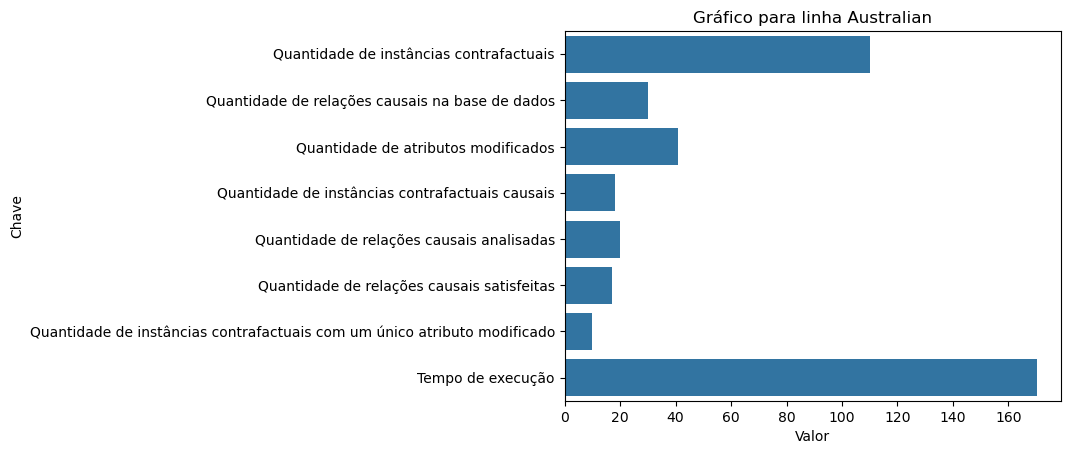

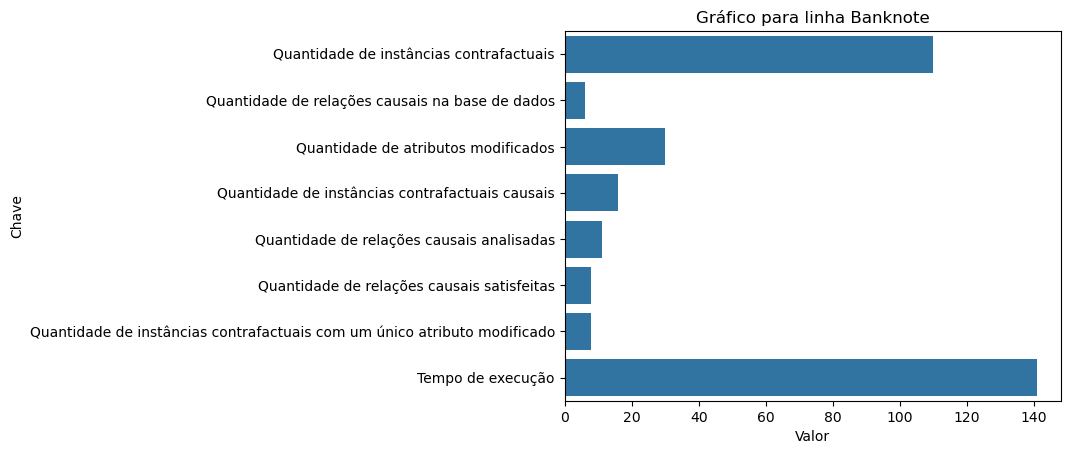

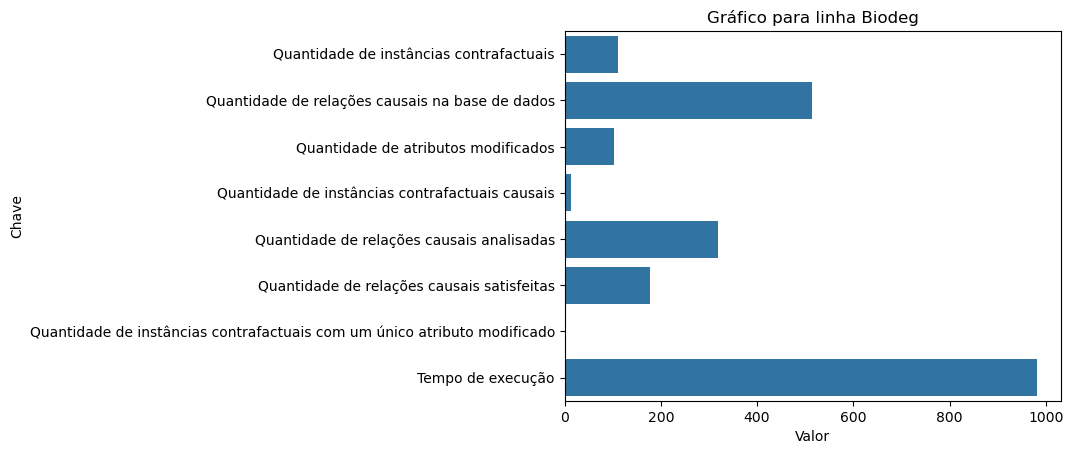

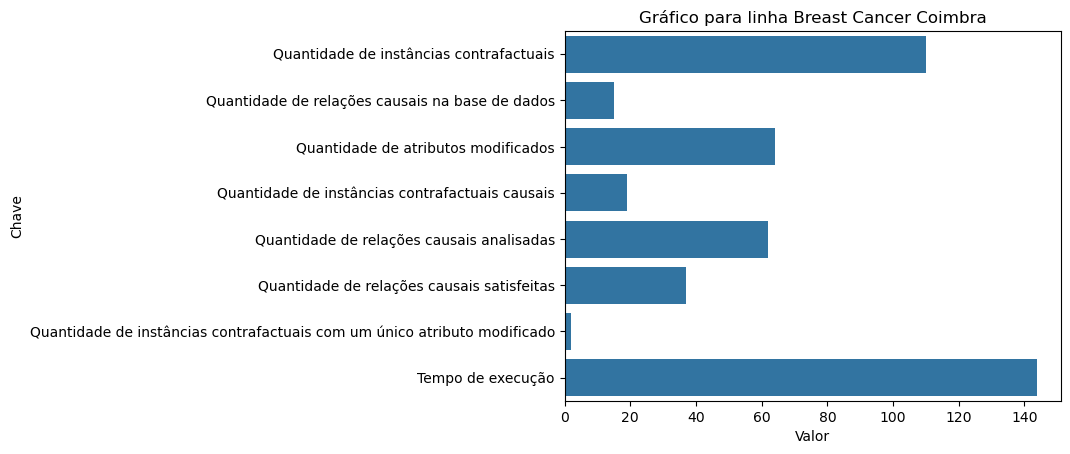

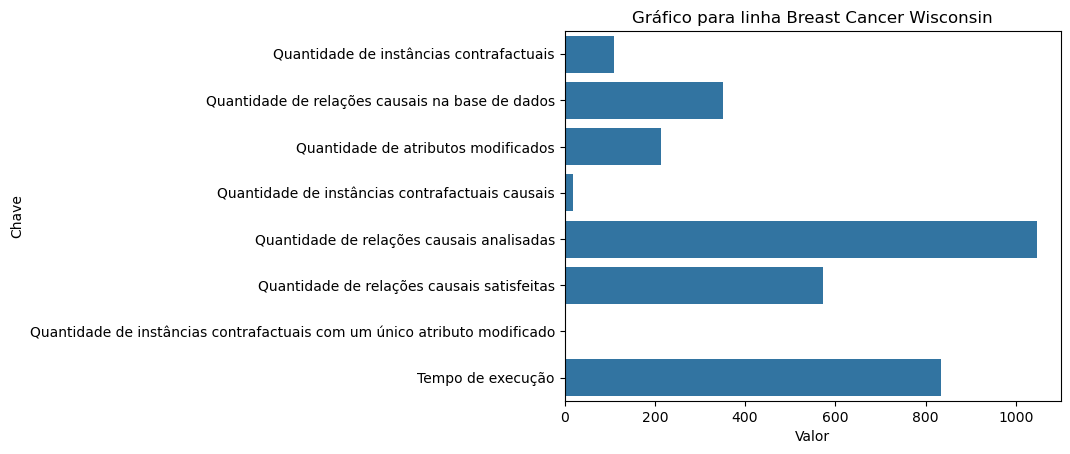

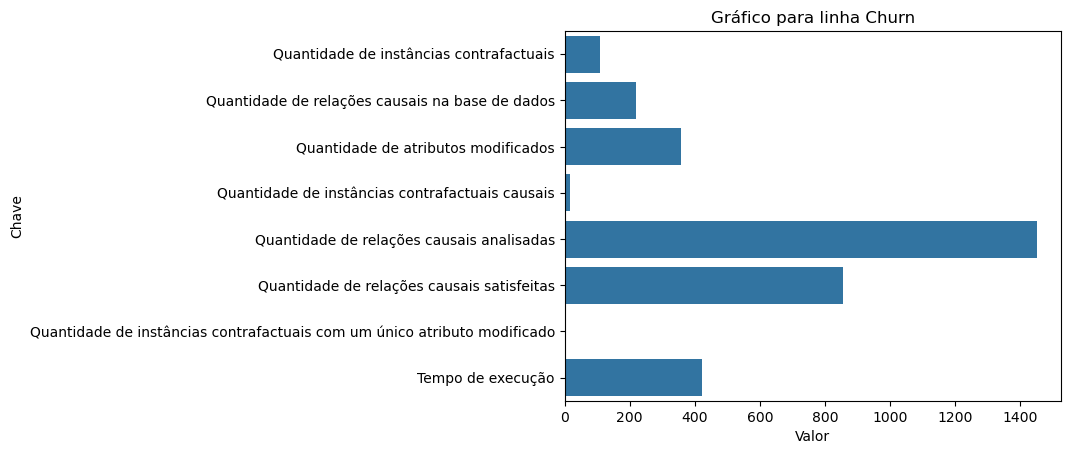

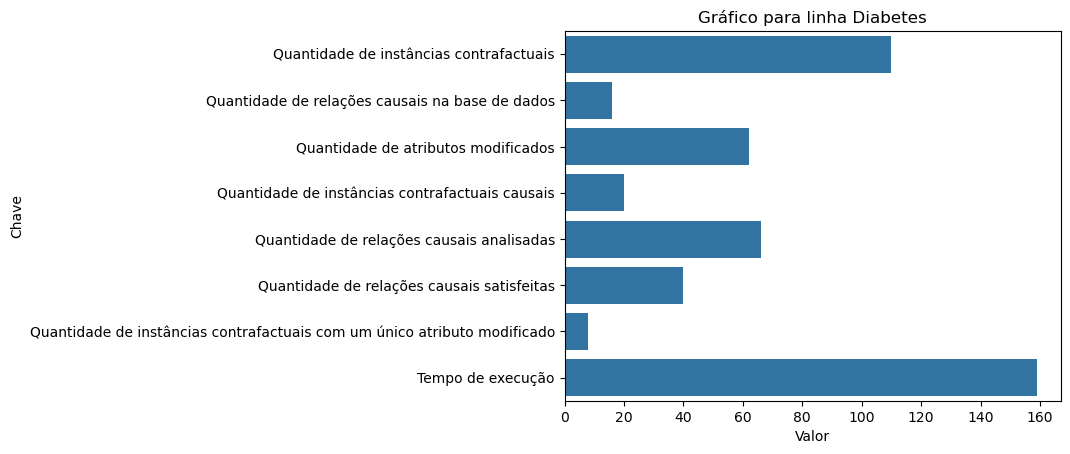

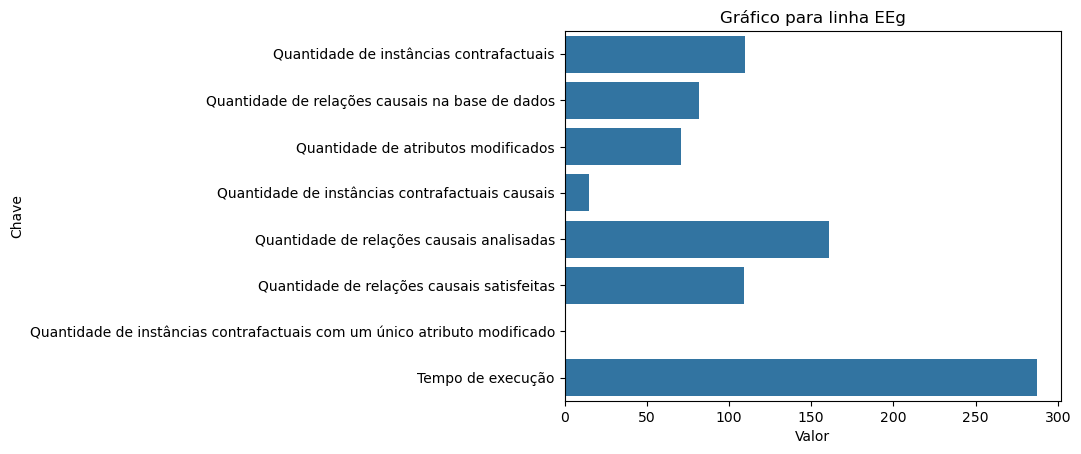

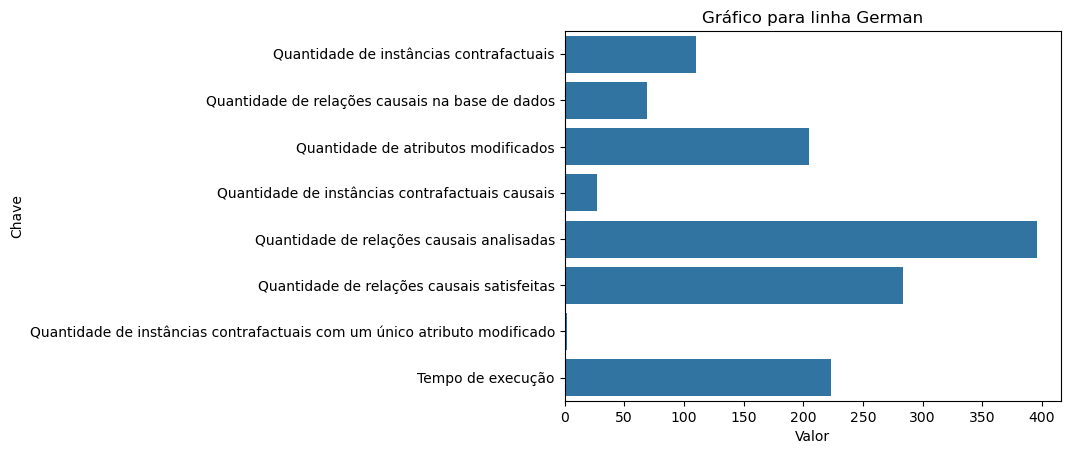

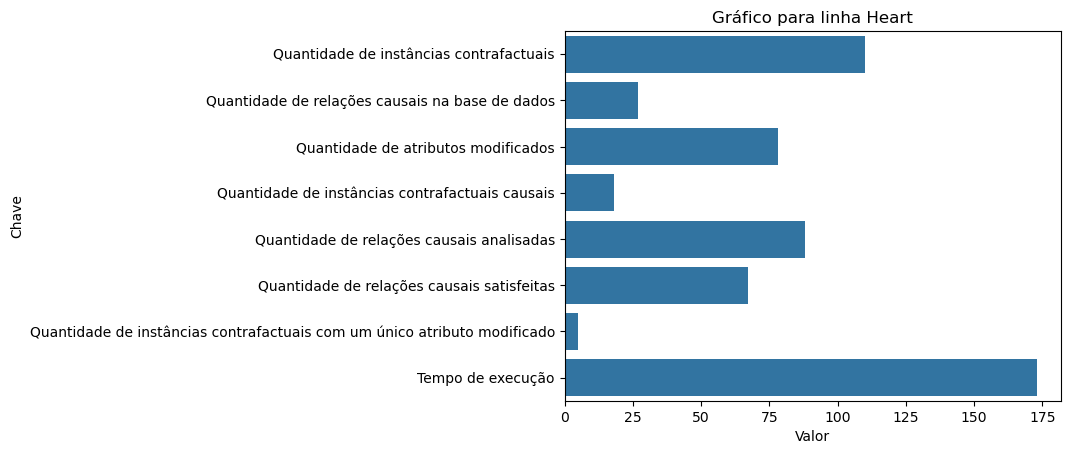

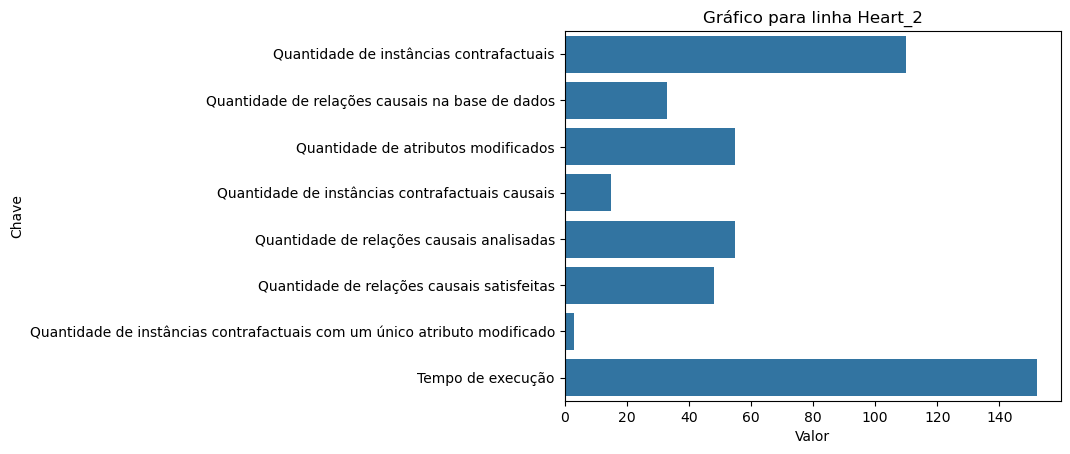

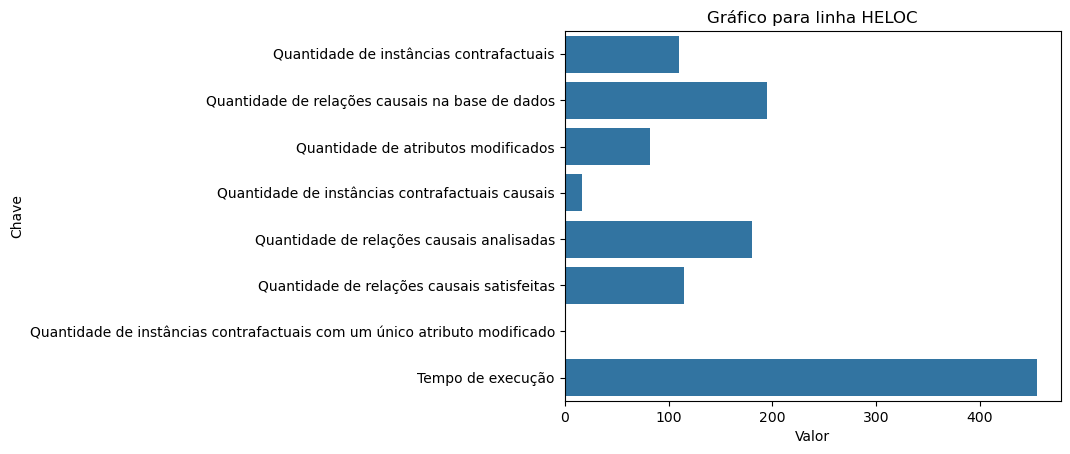

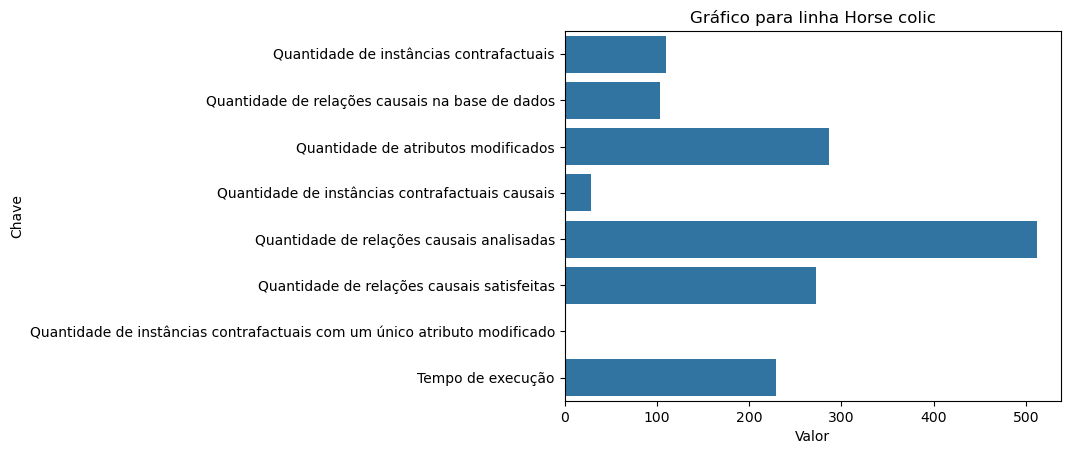

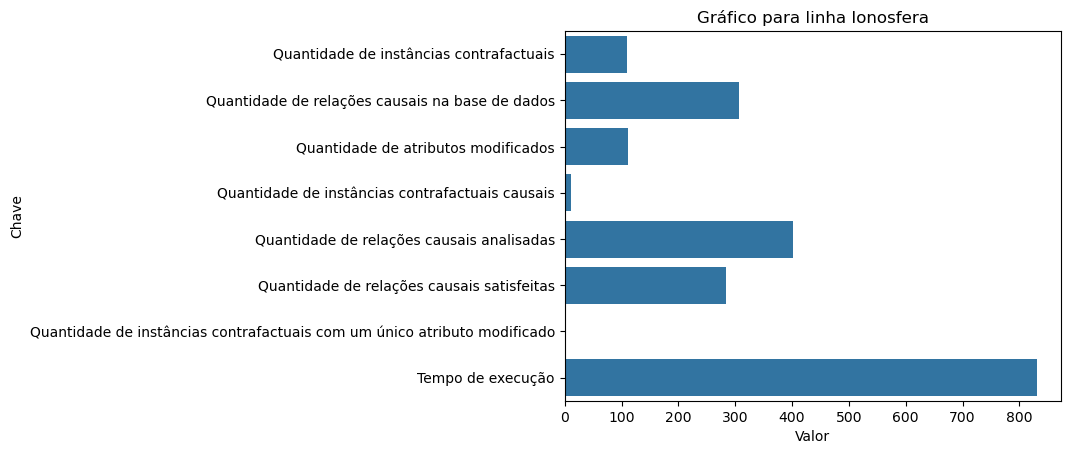

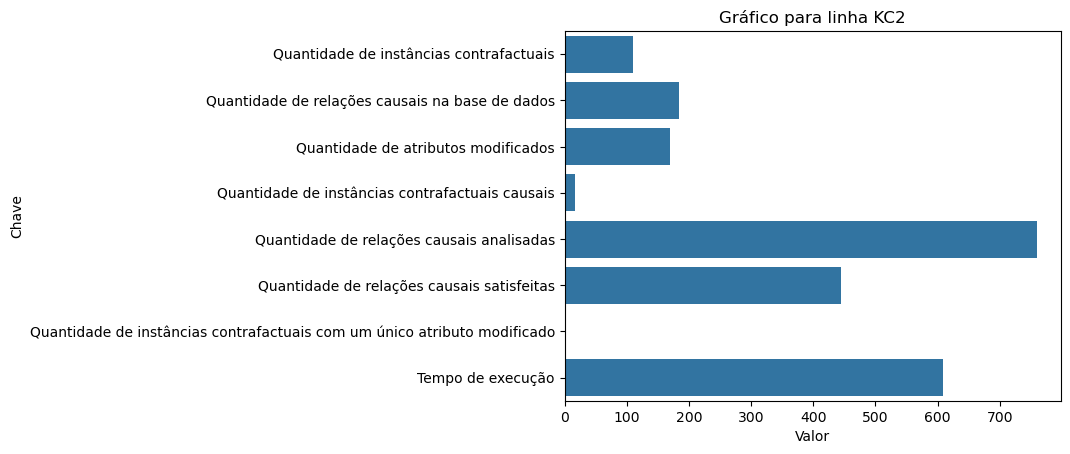

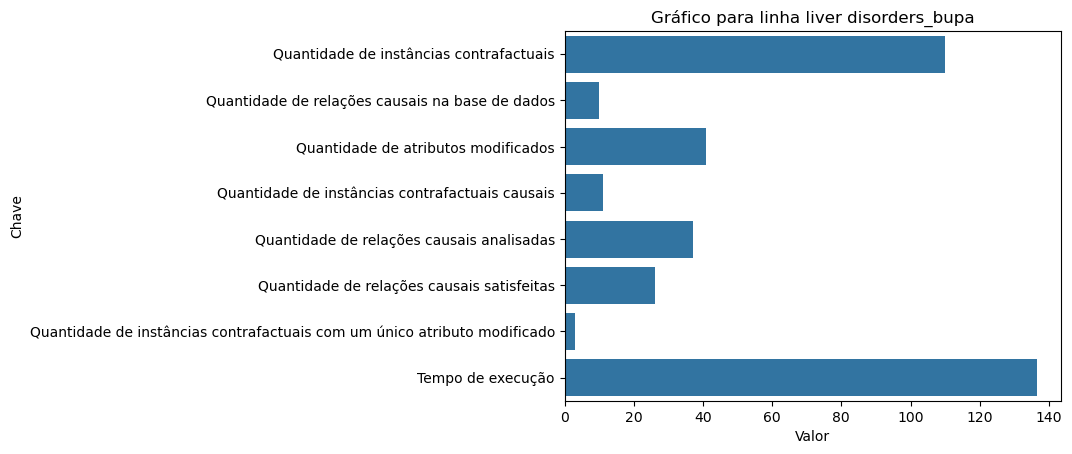

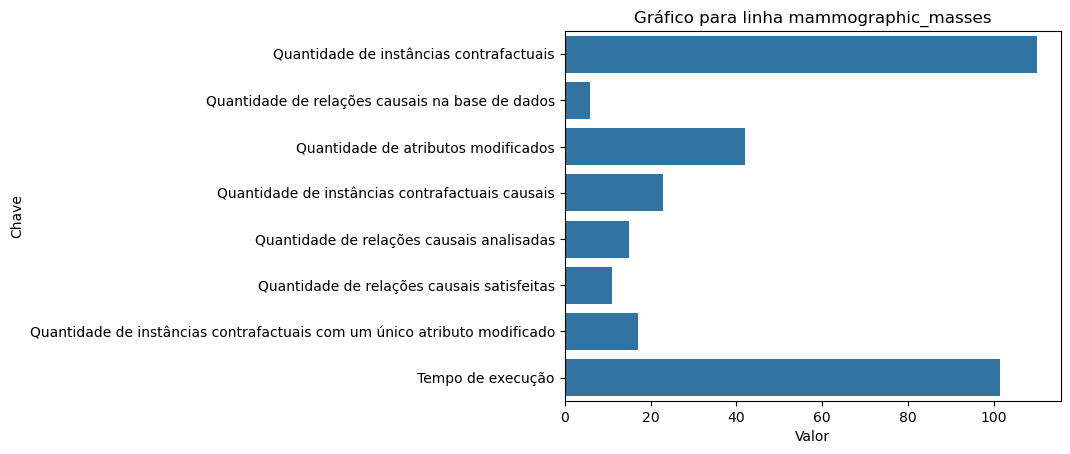

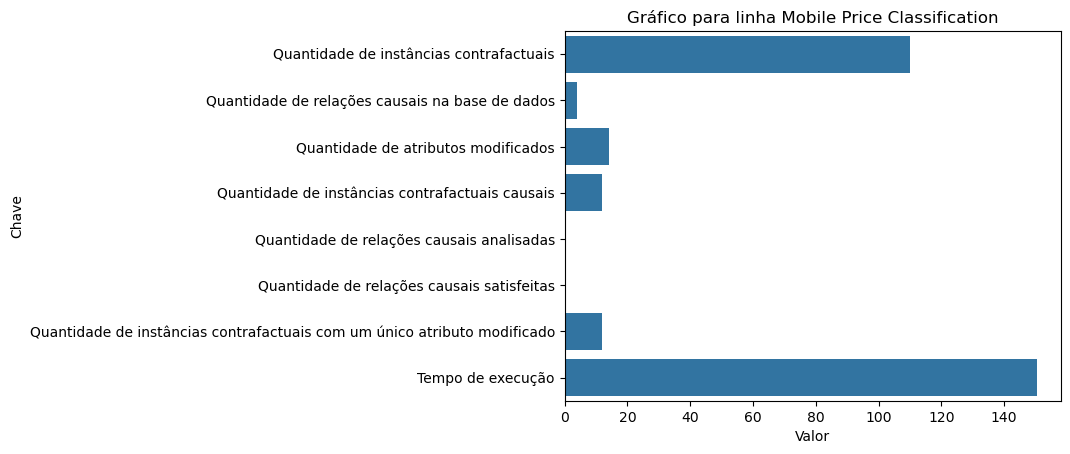

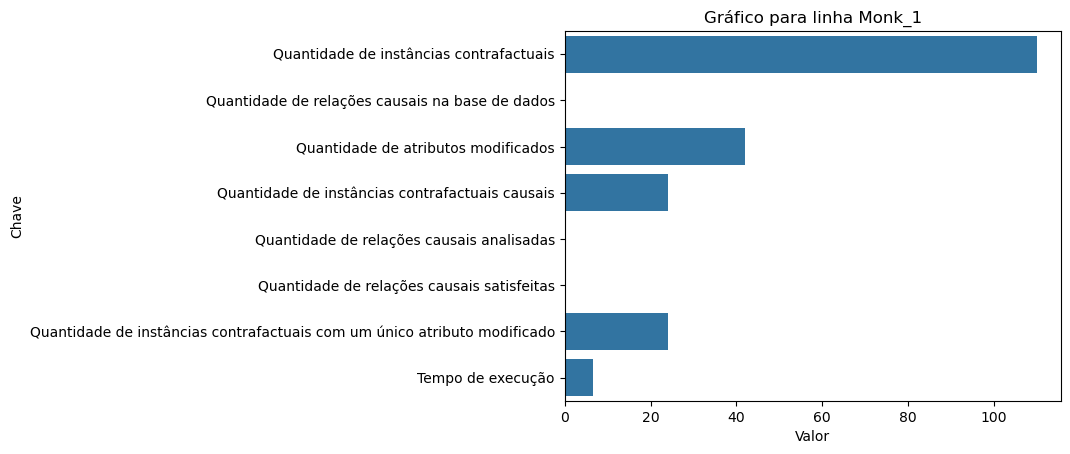

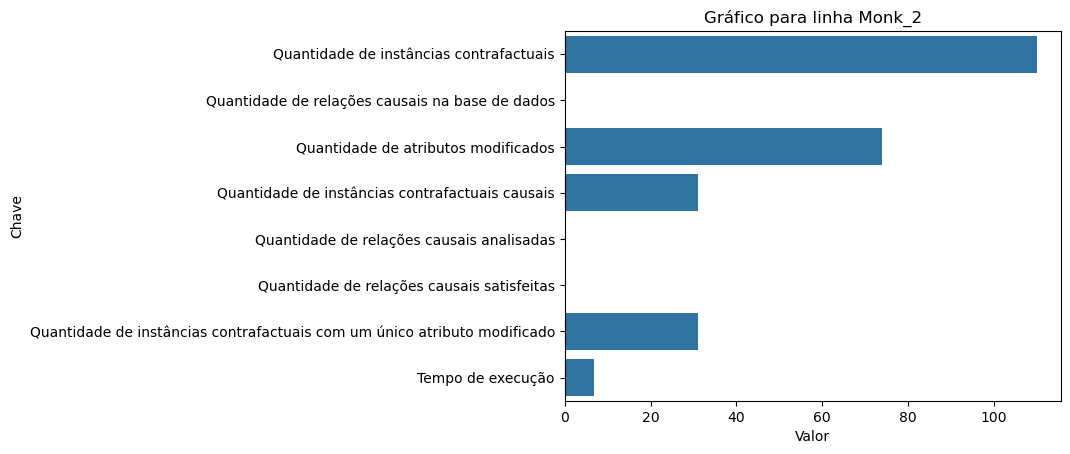

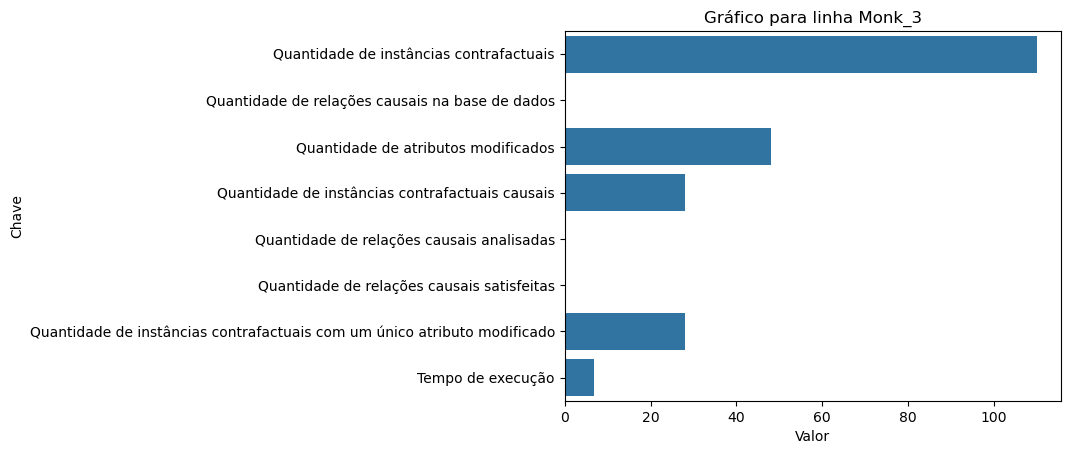

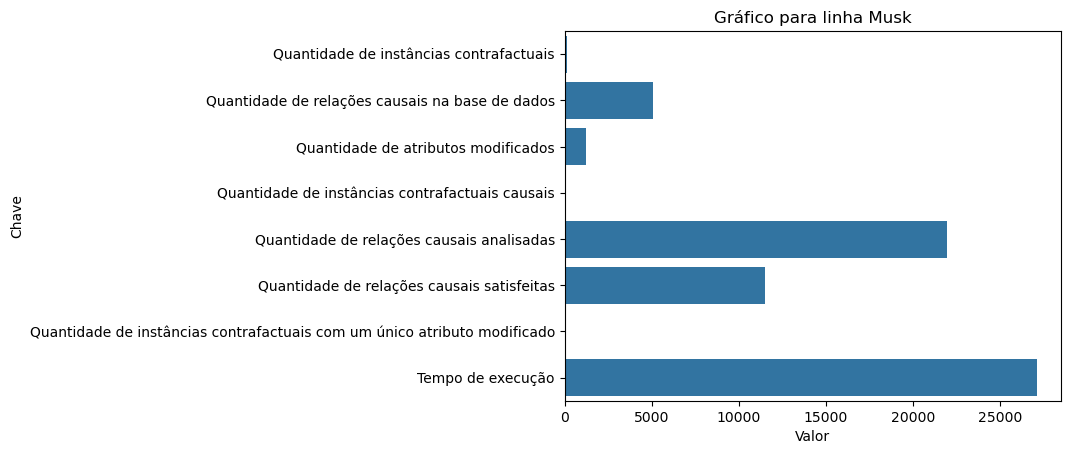

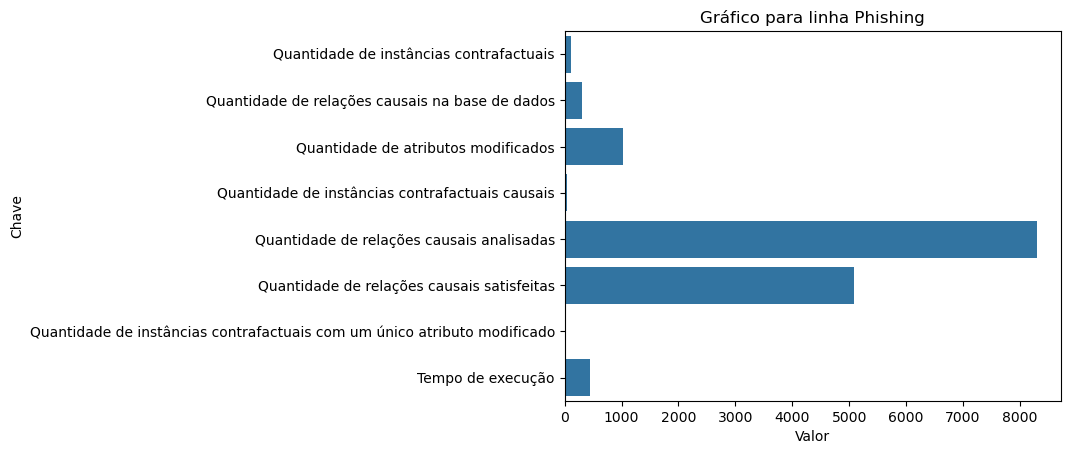

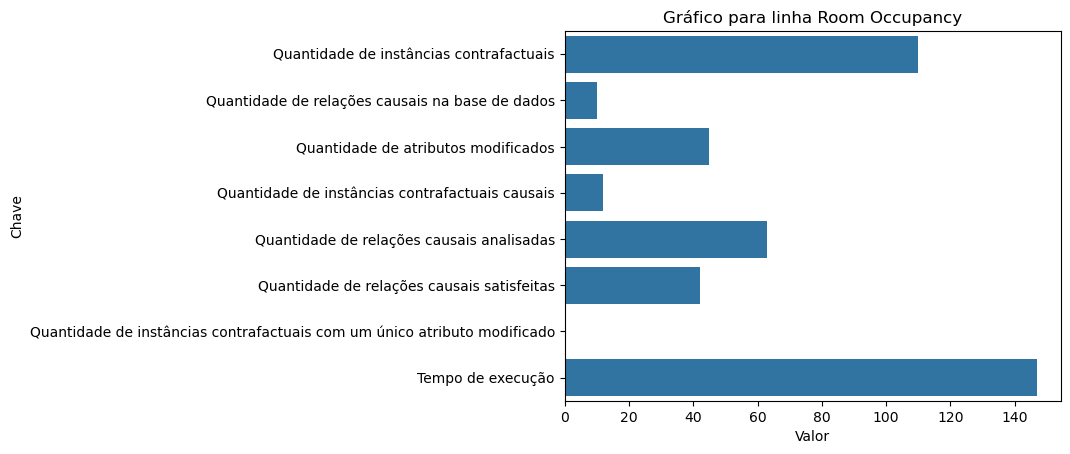

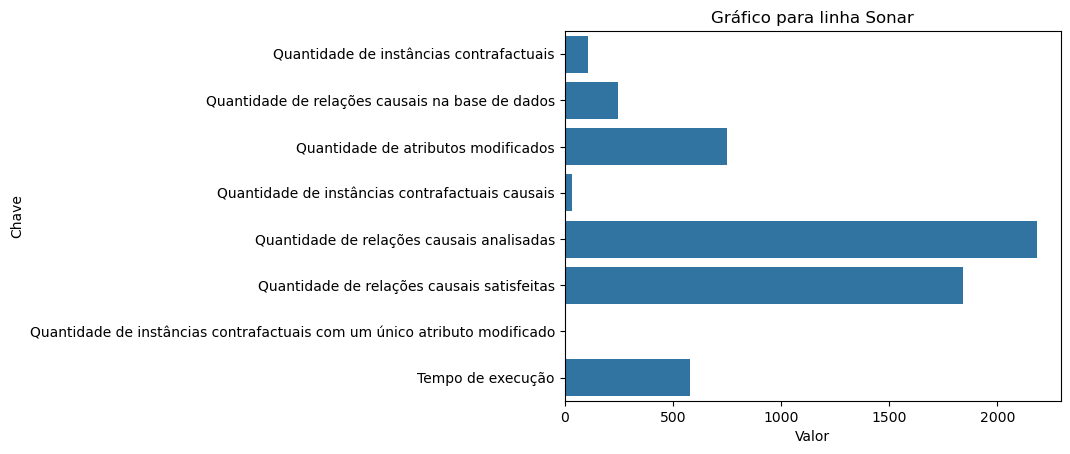

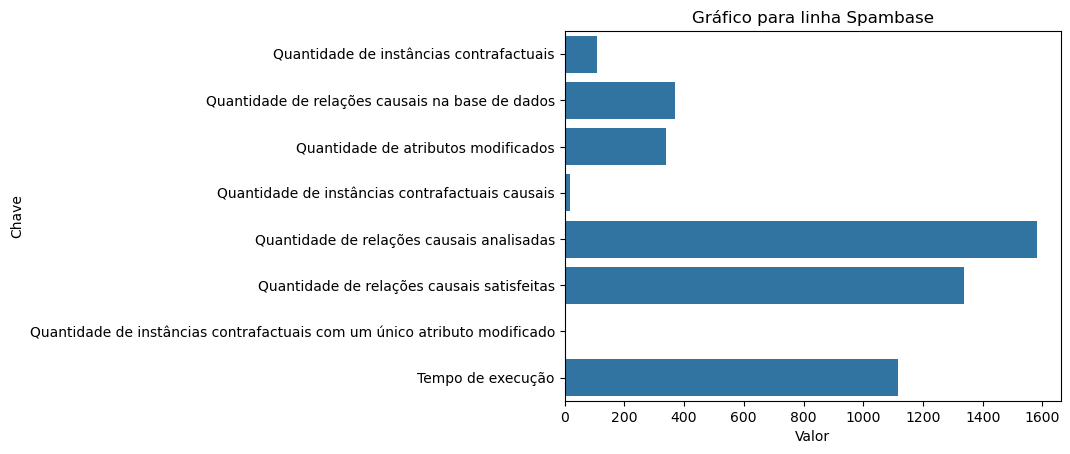

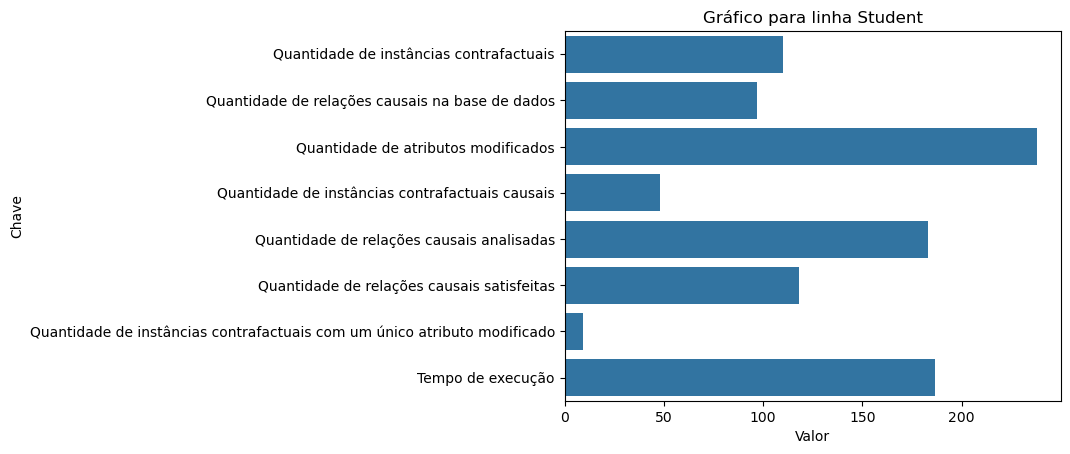

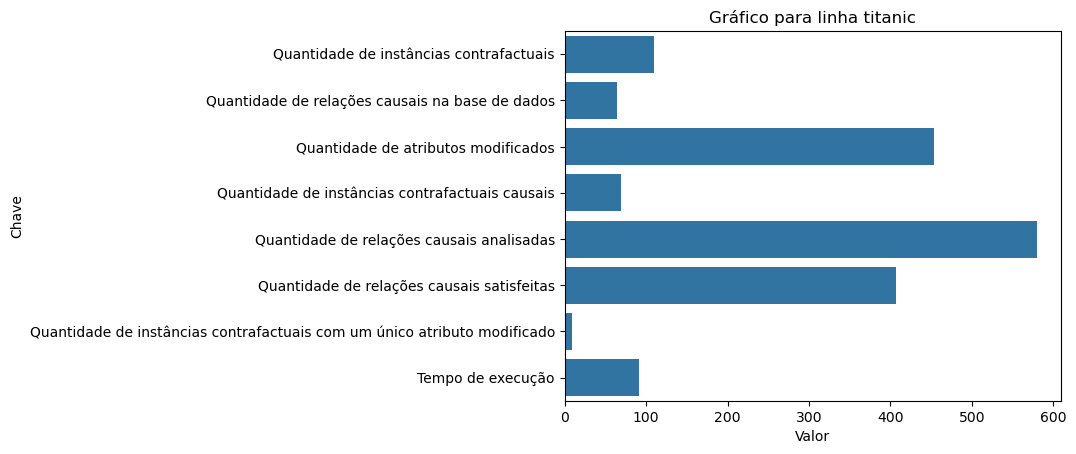

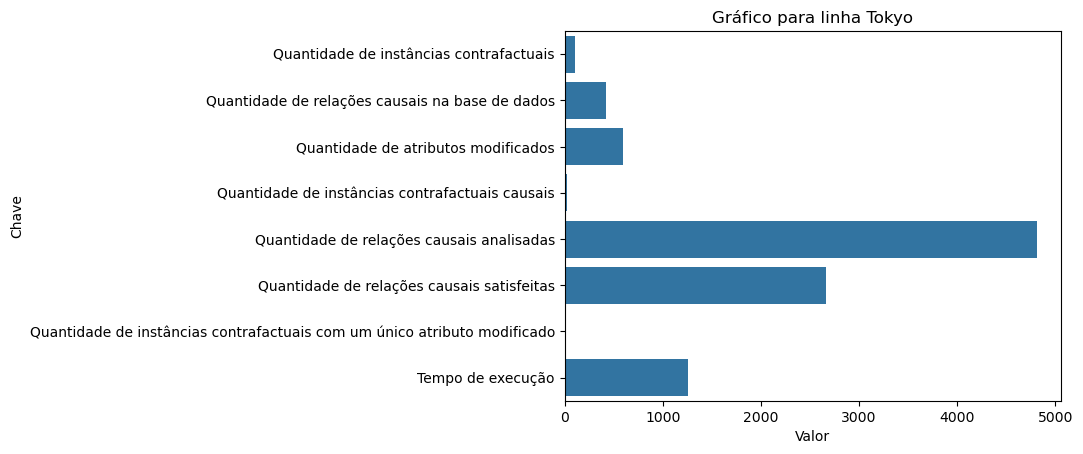

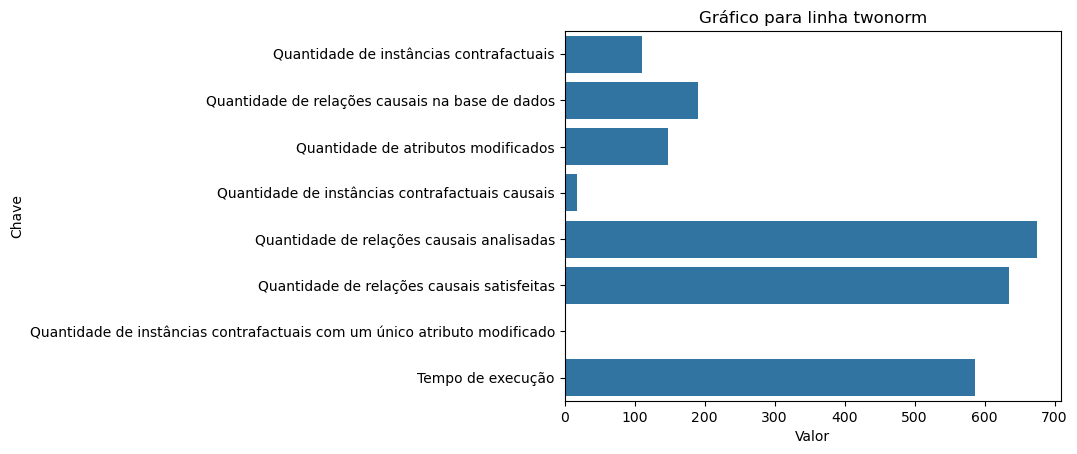

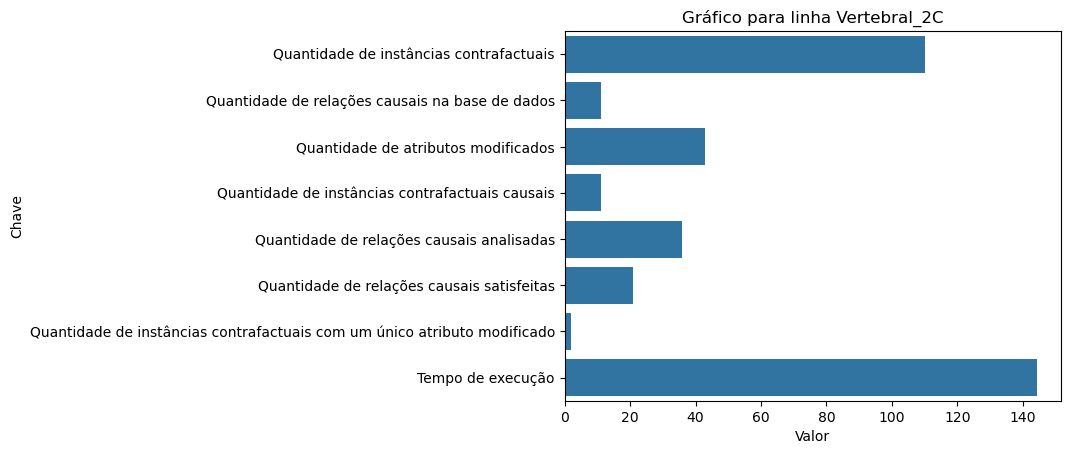

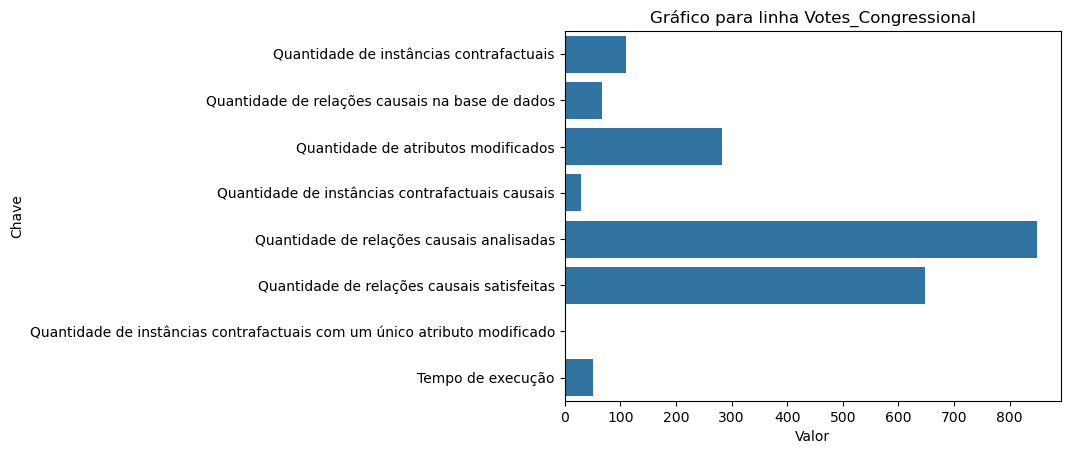

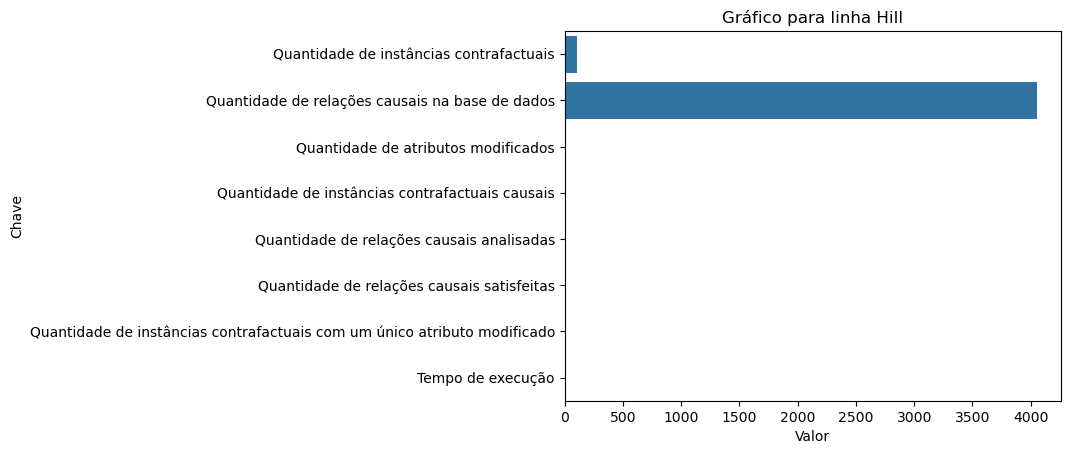

In [49]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Função para verificar se a string é um JSON válido
def is_json(myjson):
    try:
        return json.loads(myjson)
    except ValueError:
        return None

# Aplicar a função para criar uma nova coluna com dicionários JSON válidos
# df['json_dict'] = df['metrica_plot'].apply(is_json)

# Filtrar apenas as linhas onde o JSON é válido (não é None)
df_valid_json = df[df['metrica_plot'].notna()]

print(f"df_valid_json shape = {df_valid_json.shape}")

# Para cada linha (dicionário válido), plotar um gráfico de barras horizontais com Seaborn
for index, row in df_valid_json.iterrows():
    dict_data = row['metrica_plot']
    name = row['name']
    # Transformar o dicionário em um DataFrame temporário para o Seaborn
    temp_df = pd.DataFrame(list(dict_data.items()), columns=['Chave', 'Valor'])
    
    # Criando o gráfico de barras horizontais com Seaborn
    plt.figure()
    sns.barplot(x='Valor', y='Chave', data=temp_df, orient='h')
    plt.title(f'Gráfico para linha {name}')
    
    # Mostrar o gráfico
    plt.show()


In [50]:
df_valid_json.shape

(33, 7)

In [51]:
df_valid_json

name  \
1                    Australian   
2                      Banknote   
3                        Biodeg   
4         Breast Cancer Coimbra   
5       Breast Cancer Wisconsin   
6                         Churn   
9                      Diabetes   
10                          EEg   
11                       German   
13                        Heart   
14                      Heart_2   
15                        HELOC   
16                  Horse colic   
17                    Ionosfera   
18                          KC2   
19         liver disorders_bupa   
20          mammographic_masses   
21  Mobile Price Classification   
22                       Monk_1   
23                       Monk_2   
24                       Monk_3   
25                         Musk   
27                     Phishing   
28               Room Occupancy   
29                        Sonar   
30                     Spambase   
31                      Student   
32                      titanic   
33                        Tokyo   
34                      twonorm   
35                 Vertebral_2C   
37          Votes_Congressional   
39                         Hill   

                                                 path           classe  \
1             Australian/Credit_Card_Applications.csv            Class   
2                Banknote/BankNote_Authentication.csv            class   
3                              Biodeg/qsar-biodeg.csv            Class   
4            Breast Cancer Coimbra/breast_coimbra.csv   Classification   
5           Breast Cancer Wisconsin/breast-cancer.csv        diagnosis   
6   Churn/WA_Fn-UseC_-Telco-Customer-Churn_process...            Churn   
9                               Diabetes/diabetes.csv          Outcome   
10                              EEg/EEG Eye State.csv         Column15   
11                           German/german_credit.csv          default   
13                                    Heart/heart.csv           output   
14                                   Heart/heart2.csv              num   
15                         HELOC/heloc_dataset_v1.csv  RiskPerformance   
16                 Horse colic/horseV2_processada.csv          surgery   
17                           Ionosfera/ionosphere.csv           target   
18                                        KC2/KC2.csv          defects   
19                      liver disorders_bupa/bupa.csv         selector   
20  mammographic_masses/mammographic_masses_cleane...         Severity   
21  Mobile Price Classification/train_mobile_proce...            range   
22  ['Monk/monks-1_train.csv', 'Monk/monks-1_test....            Class   
23  ['Monk/monks-2_train.csv', 'Monk/monks-2_test....            Class   
24  ['Monk/monks-3_train.csv', 'Monk/monks-3_test....            Class   
25                                    Musk/clean1.csv        Column165   
27                              Phishing/Phishing.csv            Class   
28                  Room Occupancy/Room Occupancy.csv        Occupancy   
29                           Sonar/sonar.all-data.csv            class   
30                              Spambase/Spambase.csv            Class   
31    Student/Students-Performance-MAT_processada.csv            Class   
32                     titanic/titanic_processada.csv         Survived   
33                                    Tokyo/Tokyo.csv            class   
34                                twonorm/twonorm.csv            class   
35                            Vertebral/column_2C.csv            class   
37  Votes_Congressional/house-votes-84_processada.csv       Class Name   
39  ['Hill/Hill_Valley_with_noise_Training.csv', '...            class   

                                              metrica     metrica_v2  \
1   {"Quantidade de inst\u00e2ncias contrafactuais...           None   
2   {"Quantidade de inst\u00e2ncias contrafactuais...           None   
3   {\n    "Quantidade de instâncias contrafactuai...  zero metricas   
4   {"Quantidade de inst\u00e2n

In [52]:
import pandas as pd

In [4]:
dfz = pd.read_parquet(f"s3://omar-testes-gerais/artigos/artifacts/dfm_use.parquet")
dfz

name  \
0                         Adult   
1                    Australian   
2                      Banknote   
3                        Biodeg   
4         Breast Cancer Coimbra   
5       Breast Cancer Wisconsin   
6                         Churn   
7                        Compas   
8                Credit default   
9                      Diabetes   
10                          EEg   
11                       German   
12             GiveMeSomeCredit   
13                        Heart   
14                      Heart_2   
15                        HELOC   
16                  Horse colic   
17                    Ionosfera   
18                          KC2   
19         liver disorders_bupa   
20          mammographic_masses   
21  Mobile Price Classification   
22                       Monk_1   
23                       Monk_2   
24                       Monk_3   
25                         Musk   
26         OnlineNewsPopularity   
27                     Phishing   
28               Room Occupancy   
29                        Sonar   
30                     Spambase   
31                      Student   
32                      titanic   
33                        Tokyo   
34                      twonorm   
35                 Vertebral_2C   
36                 Vertebral_3C   
37          Votes_Congressional   
38                         wine   
39                         Hill   

                                                 path  \
0                          adult/adult_processada.csv   
1             Australian/Credit_Card_Applications.csv   
2                Banknote/BankNote_Authentication.csv   
3                              Biodeg/qsar-biodeg.csv   
4            Breast Cancer Coimbra/breast_coimbra.csv   
5           Breast Cancer Wisconsin/breast-cancer.csv   
6   Churn/WA_Fn-UseC_-Telco-Customer-Churn_process...   
7                  Compas/compas-scores-two-years.csv   
8                  Credit default/UCI_Credit_Card.csv   
9                               Diabetes/diabetes.csv   
10                              EEg/EEG Eye State.csv   
11                           German/german_credit.csv   
12   GiveMeSomeCredit/GiveMeSomeCredit_processada.csv   
13                                    Heart/heart.csv   
14                                   Heart/heart2.csv   
15                         HELOC/heloc_dataset_v1.csv   
16                 Horse colic/horseV2_processada.csv   
17                           Ionosfera/ionosphere.csv   
18                                        KC2/KC2.csv   
19                      liver disorders_bupa/bupa.csv   
20  mammographic_masses/mammographic_masses_cleane...   
21  Mobile Price Classification/train_mobile_proce...   
22  ['Monk/monks-1_train.csv', 'Monk/monks-1_test....   
23  ['Monk/monks-2_train.csv', 'Monk/monks-2_test....   
24  ['Monk/monks-3_train.csv', 'Monk/monks-3_test....   
25                                    Musk/clean1.csv   
26  OnlineNewsPopularity/OnlineNewsPopularity_proc...   
27                              Phishing/Phishing.csv   
28                  Room Occupancy/Room Occupancy.csv   
29                           Sonar/sonar.all-data.csv   
30                              Spambase/Spambase.csv   
31    Student/Students-Performance-MAT_processada.csv   
32                     titanic/titanic_processada.csv   
33                                    Tokyo/Tokyo.csv   
34                                twonorm/twonorm.csv   
35                            Vertebral/column_2C.csv   
36                            Vertebral/column_3C.csv   
37  Votes_Congressional/house-votes-84_processada.csv   
38                                    wine/WineQT.csv   
39  ['Hill/Hill_Valley_with_noise_Training.csv', '...   

                        classe  \
0              Above/Below 50K   
1                        Class   
2                        class   
3                        Class   
4               Classification   
5                    diagnosis   
6              

In [47]:
dfz['gerou_resultado'].astype(int).sum()

31

# Plotando cada uma das metricas

In [1]:
import boto3
import pandas as pd
import json

# Definir o bucket e as pastas
bucket_name = 'omar-testes-gerais'
path = 'artigos/causal_csse/bateria_metricas/outputs/metricas_1'
folders = ['rn', 'rf']
s3 = boto3.client('s3')

def list_files_in_folder(folder):
    response = s3.list_objects_v2(Bucket=bucket_name, Prefix=path + '/' + folder + '/')
    return [item['Key'] for item in response.get('Contents', []) if item['Key'].endswith('.json')]

def load_json_from_s3(key):
    obj = s3.get_object(Bucket=bucket_name, Key=key)
    return json.loads(obj['Body'].read().decode('utf-8'))

# Listar e carregar os JSONs
data = {}
for folder in folders:
    files = list_files_in_folder(folder)
    for file_key in files:
        base_name = file_key.split('/')[-1].replace('.json', '')  # Extrair o nome da base
        json_data = load_json_from_s3(file_key)
        if base_name not in data:
            data[base_name] = {}
        data[base_name][folder] = json_data  # Adicionar o JSON à base

import pandas as pd

# Reformatar os dados para criar um DataFrame
data_reformatted = {}

# Iterar sobre as bases de dados e as pastas (rn, rf)
for base, folders_data in data.items():
    for folder, metrics in folders_data.items():
        for metric, value in metrics.items():
            # A chave do dicionário será uma tupla (base, folder)
            if metric not in data_reformatted:
                data_reformatted[metric] = {}
            data_reformatted[metric][(base, folder)] = value

# Criar o DataFrame com MultiIndex nas linhas (base de dados, pasta)
df = pd.DataFrame.from_dict(data_reformatted).unstack(level=1)

# Exibir o DataFrame
df



Quantidade de instâncias contrafactuais       \
                                                                 rf   rn   
Australian                                                      110  110   
Banknote                                                        110  110   
Biodeg                                                          110  110   
Breast Cancer Coimbra                                           110  110   
Breast Cancer Wisconsin                                         110  110   
Churn                                                           110  110   
Diabetes                                                        110  110   
EEg                                                             110  110   
German                                                          110  110   
HELOC                                                           110  110   
Heart                                                           110  110   
Heart_2                                                         110  110   
Hill                                                            110  110   
Horse colic                                                     110  110   
Ionosfera                                                       110  110   
KC2                                                             110  110   
Mobile Price Classification                                     110  110   
Monk_1                                                          110  110   
Monk_2                                                          110  110   
Monk_3                                                          110  110   
Musk                                                            110  110   
Phishing                                                        110  110   
Room Occupancy                                                  110  110   
Sonar                                                           110  110   
Spambase                                                        110  110   
Student                                                         110  110   
Tokyo                                                           110  110   
Vertebral_2C                                                    110  110   
Votes_Congressional                                             110  110   
liver disorders_bupa                                            110  110   
mammographic_masses                                             110  110   
titanic                                                         110  110   
twonorm                                                         110  110   

                            Quantidade de relações causais na base de dados  \
                                                                         rf   
Australian                                                               30   
Banknote                                                                  6   
Biodeg                                                                  515   
Breast Cancer Coimbra                                                    15   
Breast Cancer Wisconsin                                                 351   
Churn                                                                   220   
Diabetes                                                                 16   
EEg                                                                      82   
German                                                                   69   
HELOC                                                                   195   
Heart                                                                    27   
Heart_2                                                                  33   
Hill                                                                   4054   
Horse colic                                                             103   
Ionosfera                                                               306   
KC2                     

In [2]:
df.drop('Hill', inplace = True)
df

Quantidade de instâncias contrafactuais       \
                                                                 rf   rn   
Australian                                                      110  110   
Banknote                                                        110  110   
Biodeg                                                          110  110   
Breast Cancer Coimbra                                           110  110   
Breast Cancer Wisconsin                                         110  110   
Churn                                                           110  110   
Diabetes                                                        110  110   
EEg                                                             110  110   
German                                                          110  110   
HELOC                                                           110  110   
Heart                                                           110  110   
Heart_2                                                         110  110   
Horse colic                                                     110  110   
Ionosfera                                                       110  110   
KC2                                                             110  110   
Mobile Price Classification                                     110  110   
Monk_1                                                          110  110   
Monk_2                                                          110  110   
Monk_3                                                          110  110   
Musk                                                            110  110   
Phishing                                                        110  110   
Room Occupancy                                                  110  110   
Sonar                                                           110  110   
Spambase                                                        110  110   
Student                                                         110  110   
Tokyo                                                           110  110   
Vertebral_2C                                                    110  110   
Votes_Congressional                                             110  110   
liver disorders_bupa                                            110  110   
mammographic_masses                                             110  110   
titanic                                                         110  110   
twonorm                                                         110  110   

                            Quantidade de relações causais na base de dados  \
                                                                         rf   
Australian                                                               30   
Banknote                                                                  6   
Biodeg                                                                  515   
Breast Cancer Coimbra                                                    15   
Breast Cancer Wisconsin                                                 351   
Churn                                                                   220   
Diabetes                                                                 16   
EEg                                                                      82   
German                                                                   69   
HELOC                                                                   195   
Heart                                                                    27   
Heart_2                                                                  33   
Horse colic                                                             103   
Ionosfera                                                               306   
KC2                                                                     184   
Mobile Price Classification                                               4   
Monk_1               

In [5]:
df_size = dfz[dfz['name'].isin(df.index)]
df_size

name  \
1                    Australian   
2                      Banknote   
3                        Biodeg   
4         Breast Cancer Coimbra   
5       Breast Cancer Wisconsin   
6                         Churn   
9                      Diabetes   
10                          EEg   
11                       German   
13                        Heart   
14                      Heart_2   
15                        HELOC   
16                  Horse colic   
17                    Ionosfera   
18                          KC2   
19         liver disorders_bupa   
20          mammographic_masses   
21  Mobile Price Classification   
22                       Monk_1   
23                       Monk_2   
24                       Monk_3   
25                         Musk   
27                     Phishing   
28               Room Occupancy   
29                        Sonar   
30                     Spambase   
31                      Student   
32                      titanic   
33                        Tokyo   
34                      twonorm   
35                 Vertebral_2C   
37          Votes_Congressional   

                                                 path           classe  \
1             Australian/Credit_Card_Applications.csv            Class   
2                Banknote/BankNote_Authentication.csv            class   
3                              Biodeg/qsar-biodeg.csv            Class   
4            Breast Cancer Coimbra/breast_coimbra.csv   Classification   
5           Breast Cancer Wisconsin/breast-cancer.csv        diagnosis   
6   Churn/WA_Fn-UseC_-Telco-Customer-Churn_process...            Churn   
9                               Diabetes/diabetes.csv          Outcome   
10                              EEg/EEG Eye State.csv         Column15   
11                           German/german_credit.csv          default   
13                                    Heart/heart.csv           output   
14                                   Heart/heart2.csv              num   
15                         HELOC/heloc_dataset_v1.csv  RiskPerformance   
16                 Horse colic/horseV2_processada.csv          surgery   
17                           Ionosfera/ionosphere.csv           target   
18                                        KC2/KC2.csv          defects   
19                      liver disorders_bupa/bupa.csv         selector   
20  mammographic_masses/mammographic_masses_cleane...         Severity   
21  Mobile Price Classification/train_mobile_proce...            range   
22  ['Monk/monks-1_train.csv', 'Monk/monks-1_test....            Class   
23  ['Monk/monks-2_train.csv', 'Monk/monks-2_test....            Class   
24  ['Monk/monks-3_train.csv', 'Monk/monks-3_test....            Class   
25                                    Musk/clean1.csv        Column165   
27                              Phishing/Phishing.csv            Class   
28                  Room Occupancy/Room Occupancy.csv        Occupancy   
29                           Sonar/sonar.all-data.csv            class   
30                              Spambase/Spambase.csv            Class   
31    Student/Students-Performance-MAT_processada.csv            Class   
32                     titanic/titanic_processada.csv         Survived   
33                                    Tokyo/Tokyo.csv            class   
34                                twonorm/twonorm.csv            class   
35                            Vertebral/column_2C.csv            class   
37  Votes_Congressional/house-votes-84_processada.csv       Class Name   

                                              metrica     metrica_v2  \
1   {"Quantidade de inst\u00e2ncias contrafactuais...           None   
2   {"Quantidade de inst\u00e2ncias contrafactuais...           None   
3   {\n    "Quantidade de instâncias contrafactuai...  zero metricas   
4   {"Quantidade de inst\u00e2ncias contrafactuais...           None   
5   {"Quantidade de inst\u00e2ncias contrafactuais...           None

In [6]:
import ast

In [7]:
bucket_name = 'omar-testes-gerais'
path = 'artigos/causal_csse/bateria_metricas/outputs/metricas_1'

In [8]:
path = f"s3://omar-testes-gerais/artigos/artifacts/datasets/"

In [9]:
size_list

NameError: name 'size_list' is not defined

In [10]:
import ast

size_list = []

for idx, row in df_size.iterrows():
    row = row.to_dict()

    # Verifica se 'path' parece ser uma lista (mesmo que seja uma string)
    if isinstance(row['path'], str) and row['path'].startswith('['):
        # Converte a string em uma lista real
        paths = ast.literal_eval(row['path'])
        total_size = 0
        
        zxc = pd.read_csv(f"s3://omar-testes-gerais/artigos/artifacts/datasets/{paths[1]}")
        
        # Adicionar à lista com o tamanho total dos arquivos
        size_list.append((row['name'], len(zxc.columns)))
    
    else:
        # Caso 'path' seja uma string única
        zxc = pd.read_csv(f"s3://omar-testes-gerais/artigos/artifacts/datasets/{row['path']}")
        size_list.append((row['name'], len(zxc.columns)))

size_list.sort(key=lambda x: x[1])
size_list
size_order = [x[0] for x in size_list]
size_order

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/fsspec/registry.py:279: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


['Banknote',
 'mammographic_masses',
 'Room Occupancy',
 'liver disorders_bupa',
 'Monk_1',
 'Monk_2',
 'Monk_3',
 'Vertebral_2C',
 'Diabetes',
 'Breast Cancer Coimbra',
 'Heart',
 'Heart_2',
 'EEg',
 'Australian',
 'Votes_Congressional',
 'German',
 'Mobile Price Classification',
 'twonorm',
 'KC2',
 'HELOC',
 'titanic',
 'Phishing',
 'Breast Cancer Wisconsin',
 'Ionosfera',
 'Horse colic',
 'Churn',
 'Biodeg',
 'Student',
 'Tokyo',
 'Spambase',
 'Sonar',
 'Musk']

In [13]:
size_list

[('Banknote', 5),
 ('mammographic_masses', 6),
 ('Room Occupancy', 6),
 ('liver disorders_bupa', 7),
 ('Monk_1', 7),
 ('Monk_2', 7),
 ('Monk_3', 7),
 ('Vertebral_2C', 7),
 ('Diabetes', 9),
 ('Breast Cancer Coimbra', 10),
 ('Heart', 14),
 ('Heart_2', 14),
 ('EEg', 15),
 ('Australian', 16),
 ('Votes_Congressional', 17),
 ('German', 21),
 ('Mobile Price Classification', 21),
 ('twonorm', 21),
 ('KC2', 22),
 ('HELOC', 24),
 ('titanic', 27),
 ('Phishing', 31),
 ('Breast Cancer Wisconsin', 32),
 ('Ionosfera', 35),
 ('Horse colic', 37),
 ('Churn', 41),
 ('Biodeg', 42),
 ('Student', 44),
 ('Tokyo', 45),
 ('Spambase', 58),
 ('Sonar', 61),
 ('Musk', 165)]

In [11]:
dfs = df.reindex(size_order)
dfs

Quantidade de instâncias contrafactuais       \
                                                                 rf   rn   
Banknote                                                        110  110   
mammographic_masses                                             110  110   
Room Occupancy                                                  110  110   
liver disorders_bupa                                            110  110   
Monk_1                                                          110  110   
Monk_2                                                          110  110   
Monk_3                                                          110  110   
Vertebral_2C                                                    110  110   
Diabetes                                                        110  110   
Breast Cancer Coimbra                                           110  110   
Heart                                                           110  110   
Heart_2                                                         110  110   
EEg                                                             110  110   
Australian                                                      110  110   
Votes_Congressional                                             110  110   
German                                                          110  110   
Mobile Price Classification                                     110  110   
twonorm                                                         110  110   
KC2                                                             110  110   
HELOC                                                           110  110   
titanic                                                         110  110   
Phishing                                                        110  110   
Breast Cancer Wisconsin                                         110  110   
Ionosfera                                                       110  110   
Horse colic                                                     110  110   
Churn                                                           110  110   
Biodeg                                                          110  110   
Student                                                         110  110   
Tokyo                                                           110  110   
Spambase                                                        110  110   
Sonar                                                           110  110   
Musk                                                            110  110   

                            Quantidade de relações causais na base de dados  \
                                                                         rf   
Banknote                                                                  6   
mammographic_masses                                                       6   
Room Occupancy                                                           10   
liver disorders_bupa                                                     10   
Monk_1                                                                    0   
Monk_2                                                                    0   
Monk_3                                                                    0   
Vertebral_2C                                                             11   
Diabetes                                                                 16   
Breast Cancer Coimbra                                                    15   
Heart                                                                    27   
Heart_2                                                                  33   
EEg                                                                      82   
Australian                                                               30   
Votes_Congressional                                                      68   
German                                                                   69   
Mobile Price Classifi

Matplotlib is building the font cache; this may take a moment.
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/seaborn/_statistics.py:32: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 1.22.4)
  from scipy.stats import gaussian_kde


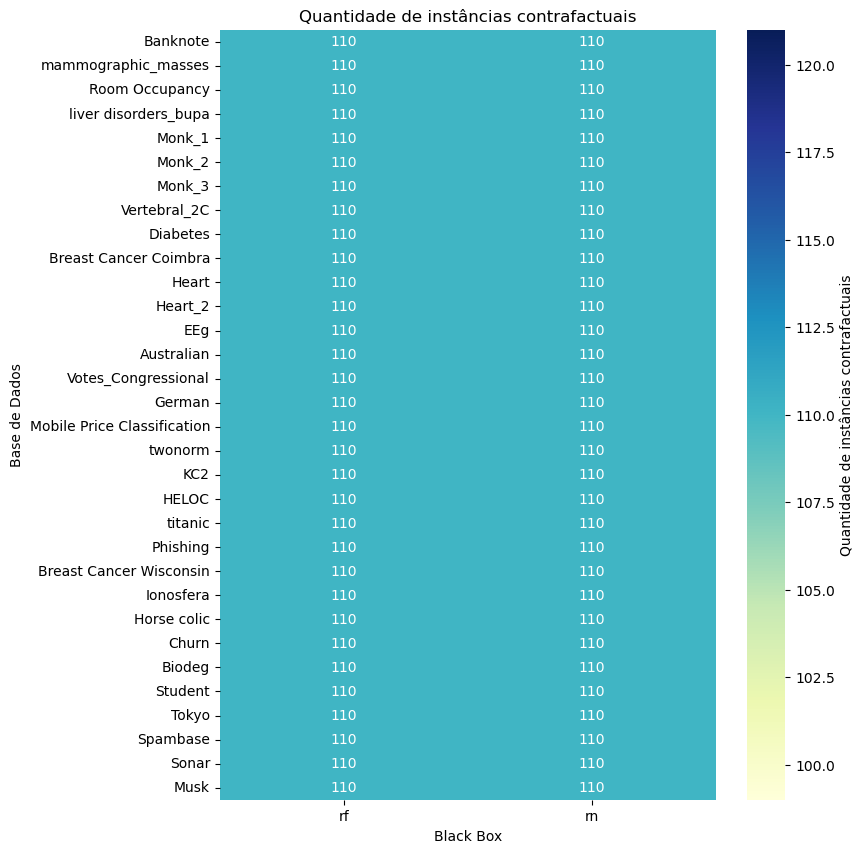

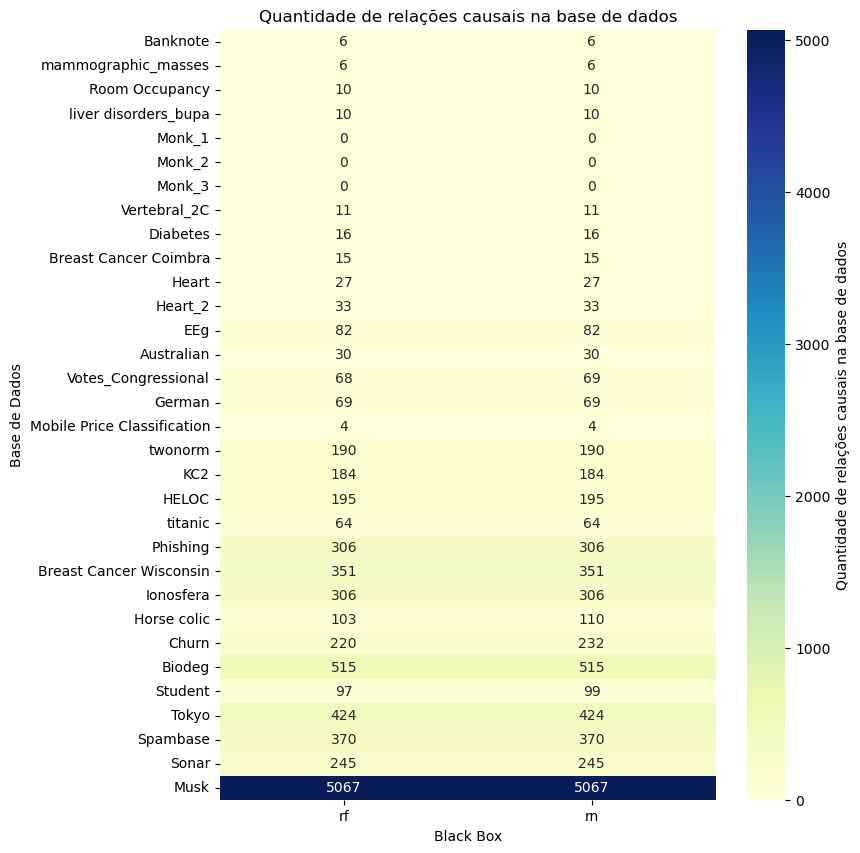

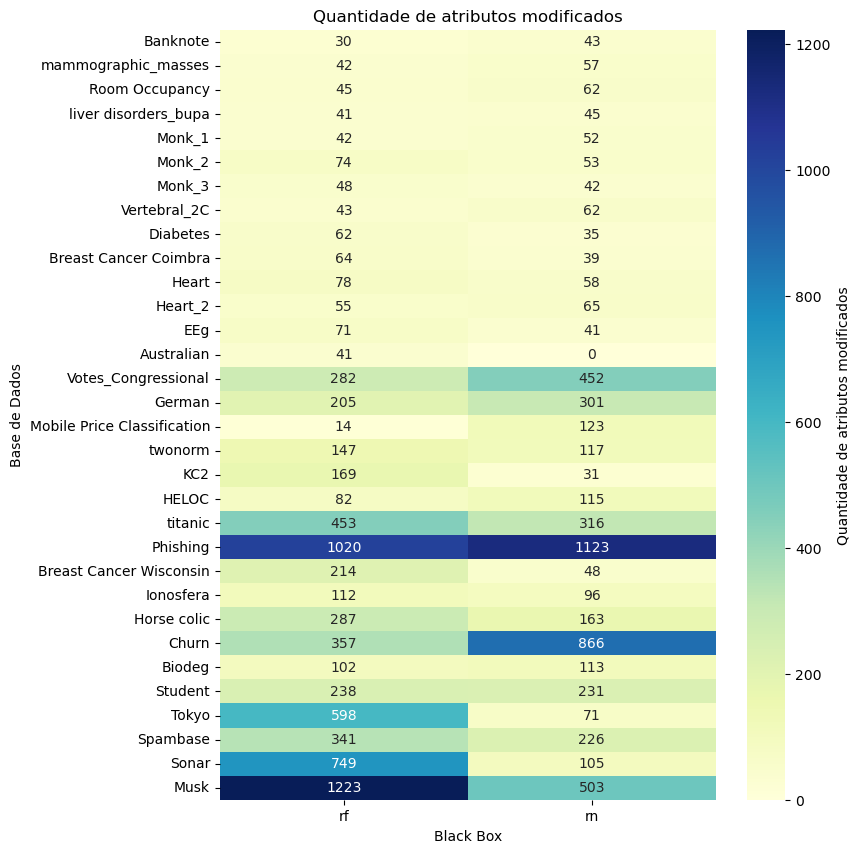

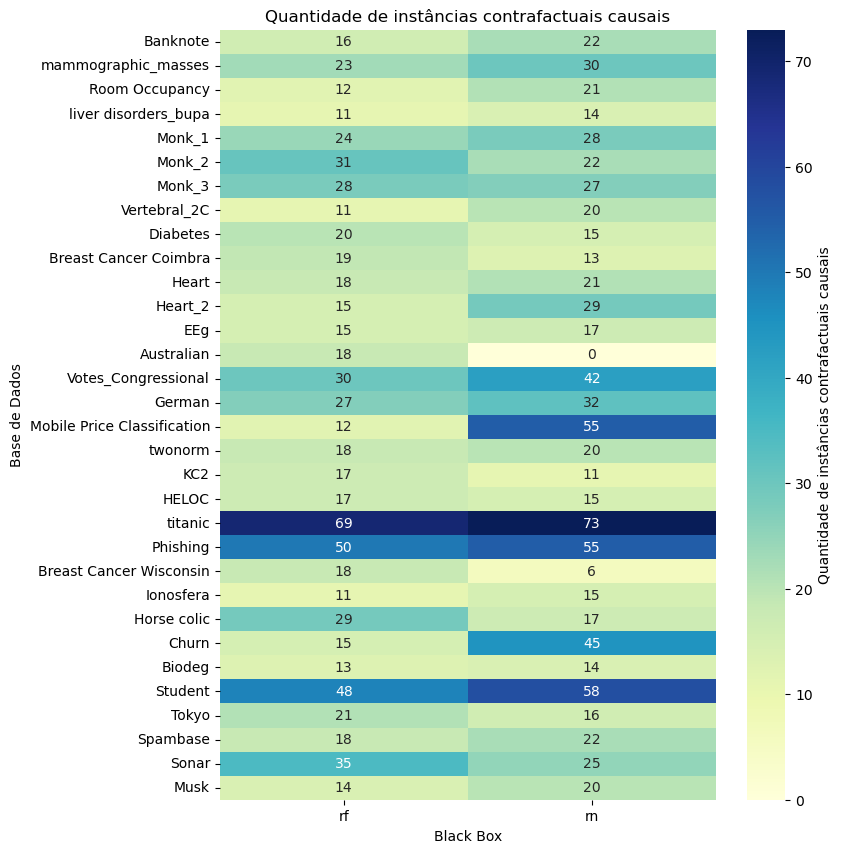

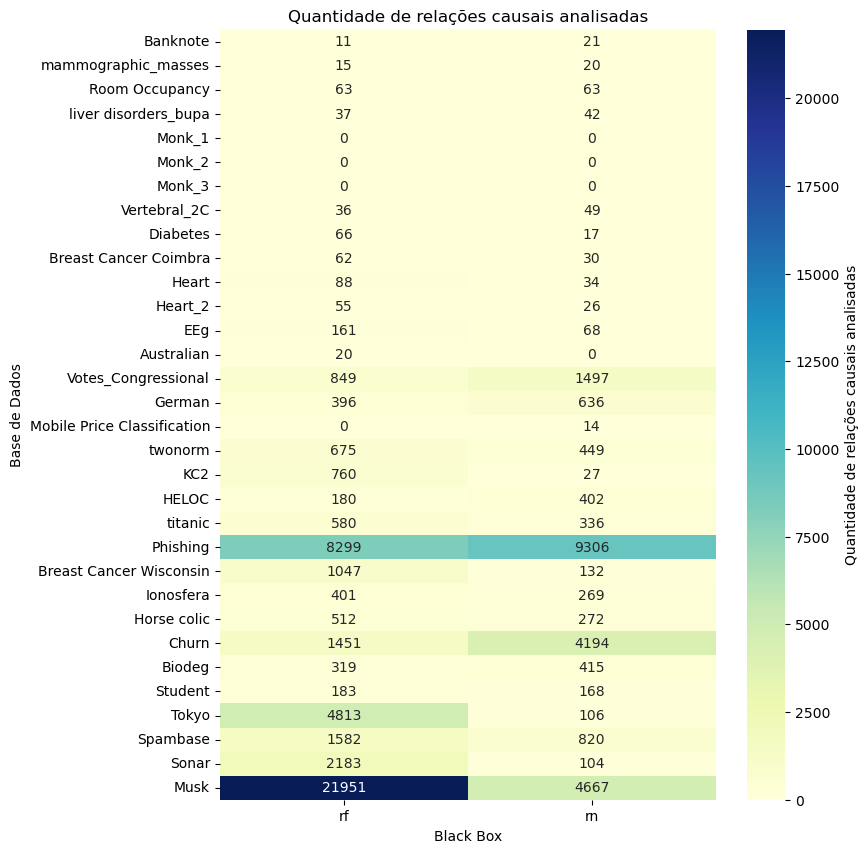

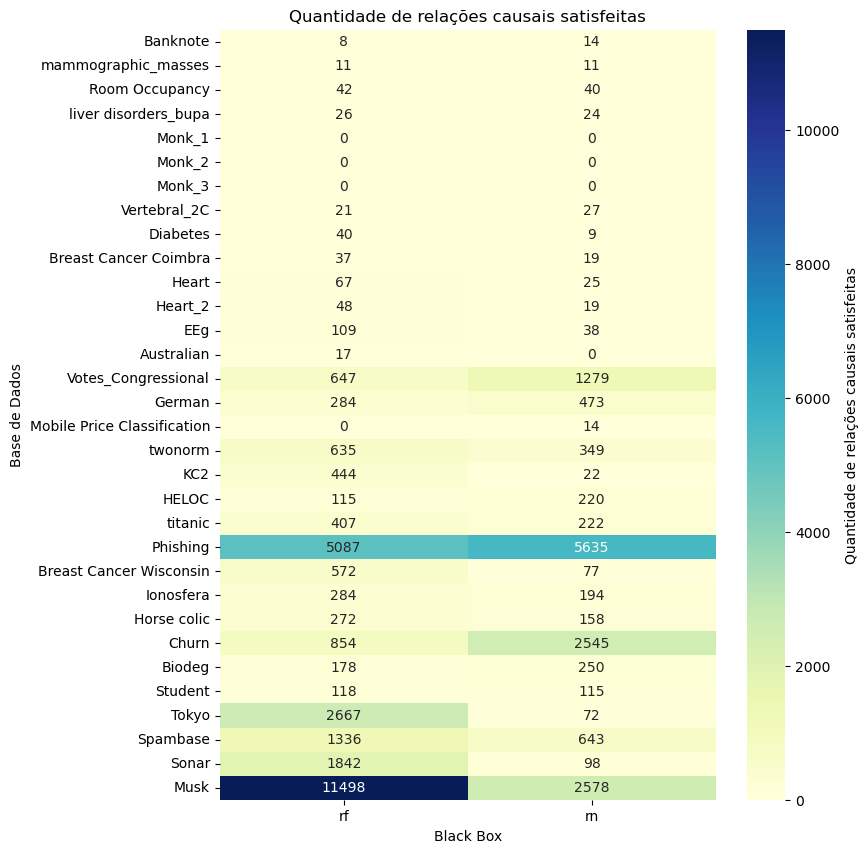

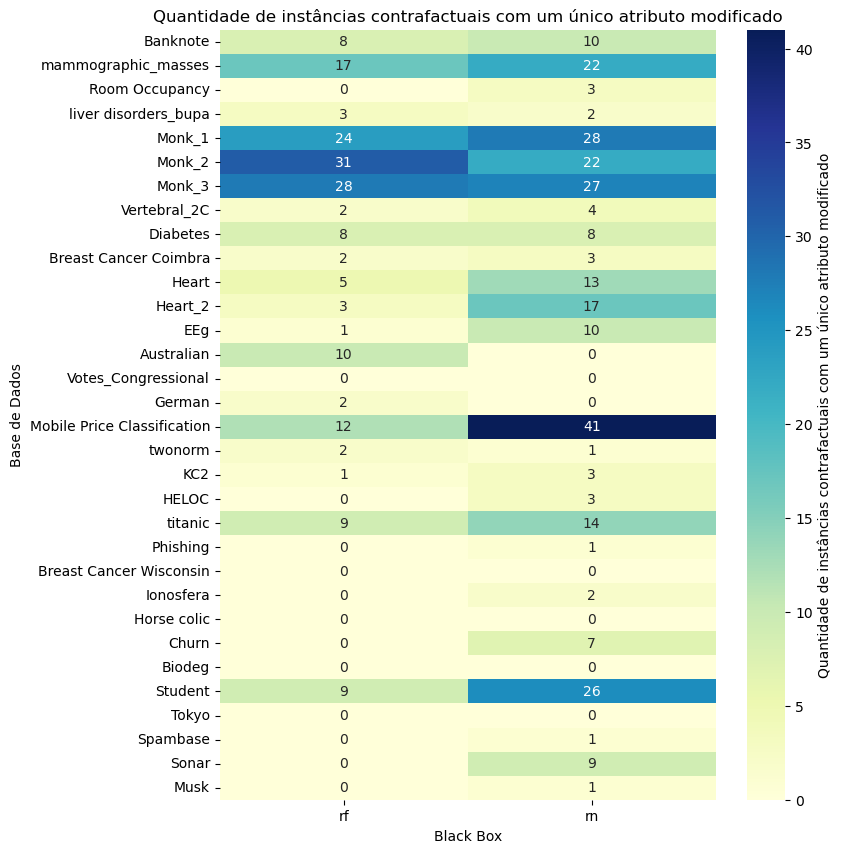

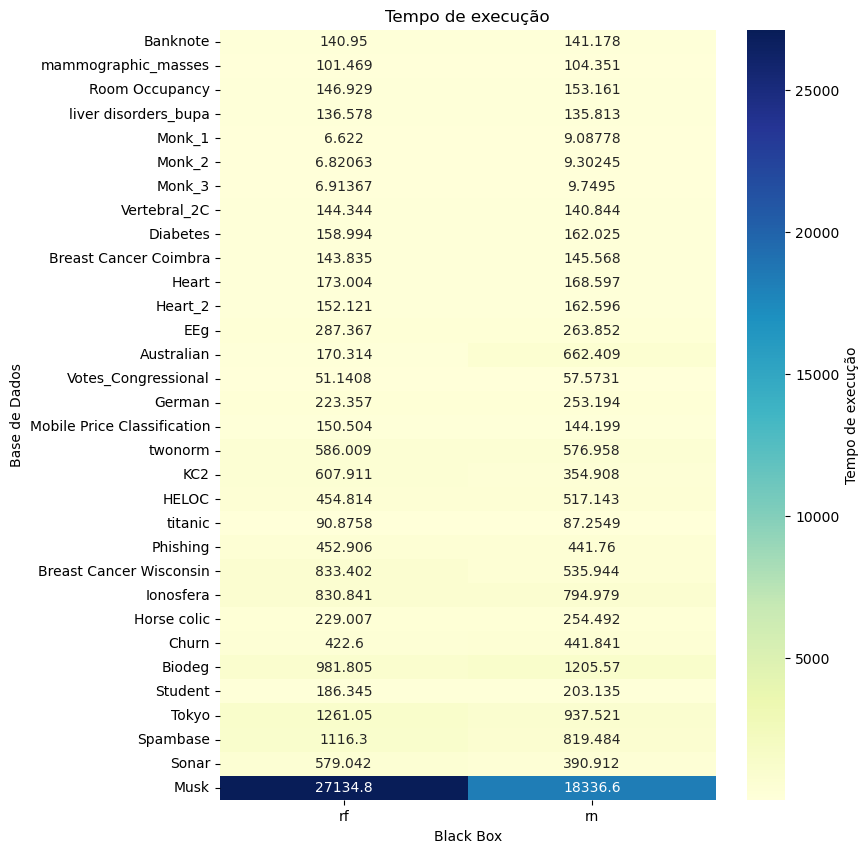

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotar heatmaps para cada métrica
for metric in dfs.columns.levels[0]:  # Iterar sobre as métricas
    plt.figure(figsize=(8, 10))
    sns.heatmap(dfs[metric], annot=True, cmap="YlGnBu", cbar_kws={'label': metric}, fmt="g")
    
    plt.title(f"{metric}")
    plt.xlabel("Black Box")
    plt.ylabel("Base de Dados")
    plt.show()


# proximos passos

In [ ]:
plotar o heatmap por tamanho da base (pequena, media, grande)
plotar o heatmap por tipo de base 

In [16]:
dataset_mapping = {
    'Banknote': {'Tamanho': 'Pequena', 'Tipo': 'Numérica'},
    'mammographic_masses': {'Tamanho': 'Pequena', 'Tipo': 'Categórica'},
    'Room Occupancy': {'Tamanho': 'Pequena', 'Tipo': 'Numérica'},
    'liver disorders_bupa': {'Tamanho': 'Pequena', 'Tipo': 'Numérica'},
    'Monk_1': {'Tamanho': 'Pequena', 'Tipo': 'Categórica'},
    'Monk_2': {'Tamanho': 'Pequena', 'Tipo': 'Categórica'},
    'Monk_3': {'Tamanho': 'Pequena', 'Tipo': 'Categórica'},
    'Vertebral_2C': {'Tamanho': 'Pequena', 'Tipo': 'Numérica'},
    'Diabetes': {'Tamanho': 'Pequena', 'Tipo': 'Numérica'},
    'Breast Cancer Coimbra': {'Tamanho': 'Pequena', 'Tipo': 'Numérica'},
    'Heart': {'Tamanho': 'Média', 'Tipo': 'Mista'},
    'Heart_2': {'Tamanho': 'Média', 'Tipo': 'Mista'},
    'EEg': {'Tamanho': 'Média', 'Tipo': 'Numérica'},
    'Australian': {'Tamanho': 'Média', 'Tipo': 'Mista'},
    'Votes_Congressional': {'Tamanho': 'Média', 'Tipo': 'Categórica'},
    'German': {'Tamanho': 'Média', 'Tipo': 'Mista'},
    'Mobile Price Classification': {'Tamanho': 'Média', 'Tipo': 'Numérica'},
    'twonorm': {'Tamanho': 'Média', 'Tipo': 'Numérica'},
    'KC2': {'Tamanho': 'Média', 'Tipo': 'Numérica'},
    'HELOC': {'Tamanho': 'Média', 'Tipo': 'Numérica'},
    'titanic': {'Tamanho': 'Média', 'Tipo': 'Mista'},
    'Phishing': {'Tamanho': 'Grande', 'Tipo': 'Categórica'},
    'Breast Cancer Wisconsin': {'Tamanho': 'Grande', 'Tipo': 'Numérica'},
    'Ionosfera': {'Tamanho': 'Grande', 'Tipo': 'Numérica'},
    'Horse colic': {'Tamanho': 'Grande', 'Tipo': 'Categórica'},
    'Churn': {'Tamanho': 'Grande', 'Tipo': 'Categórica'},
    'Biodeg': {'Tamanho': 'Grande', 'Tipo': 'Numérica'},
    'Student': {'Tamanho': 'Grande', 'Tipo': 'Mista'},
    'Tokyo': {'Tamanho': 'Grande', 'Tipo': 'Numérica'},
    'Spambase': {'Tamanho': 'Grande', 'Tipo': 'Numérica'},
    'Sonar': {'Tamanho': 'Grande', 'Tipo': 'Numérica'},
    'Musk': {'Tamanho': 'Grande', 'Tipo': 'Numérica'}
}


In [20]:
pequeno = [idx for idx, item in dataset_mapping.items() if item['Tamanho'] == "Pequena"]
medio = [idx for idx, item in dataset_mapping.items() if item['Tamanho'] == "Média"]
grande = [idx for idx, item in dataset_mapping.items() if item['Tamanho'] == "Grande"]

numerica = [idx for idx, item in dataset_mapping.items() if item['Tipo'] == "Numérica"]
categorica = [idx for idx, item in dataset_mapping.items() if item['Tipo'] == "Categórica"]
mista = [idx for idx, item in dataset_mapping.items() if item['Tipo'] == "Mista"]


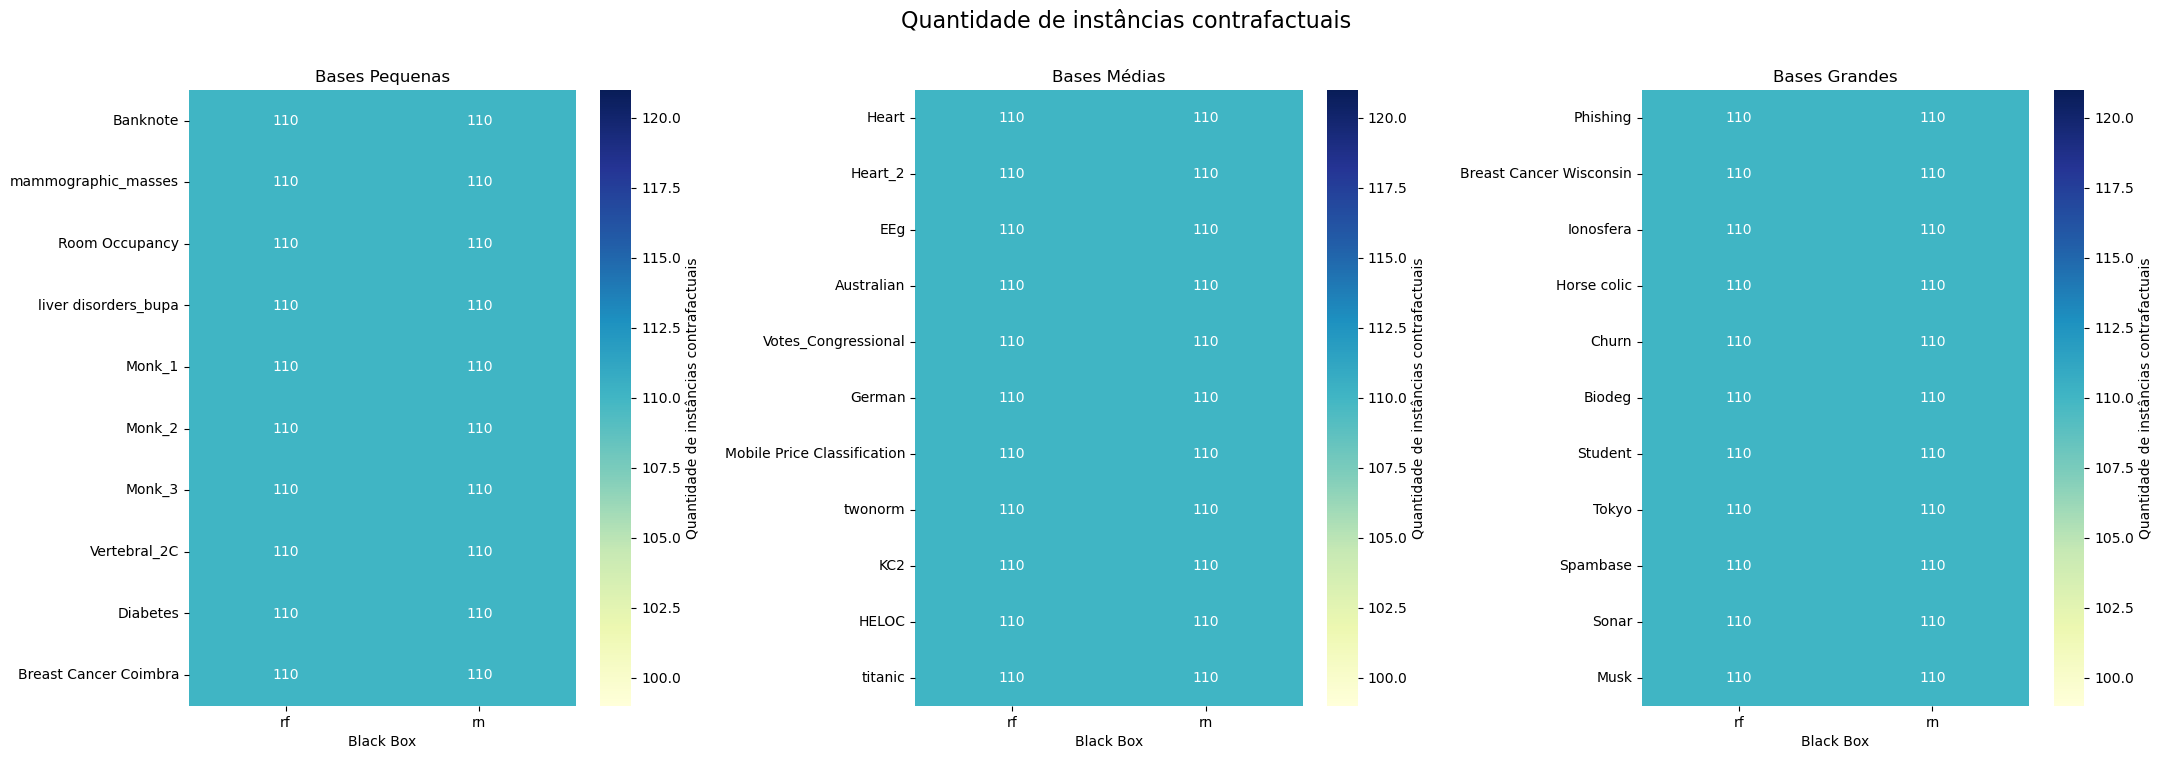

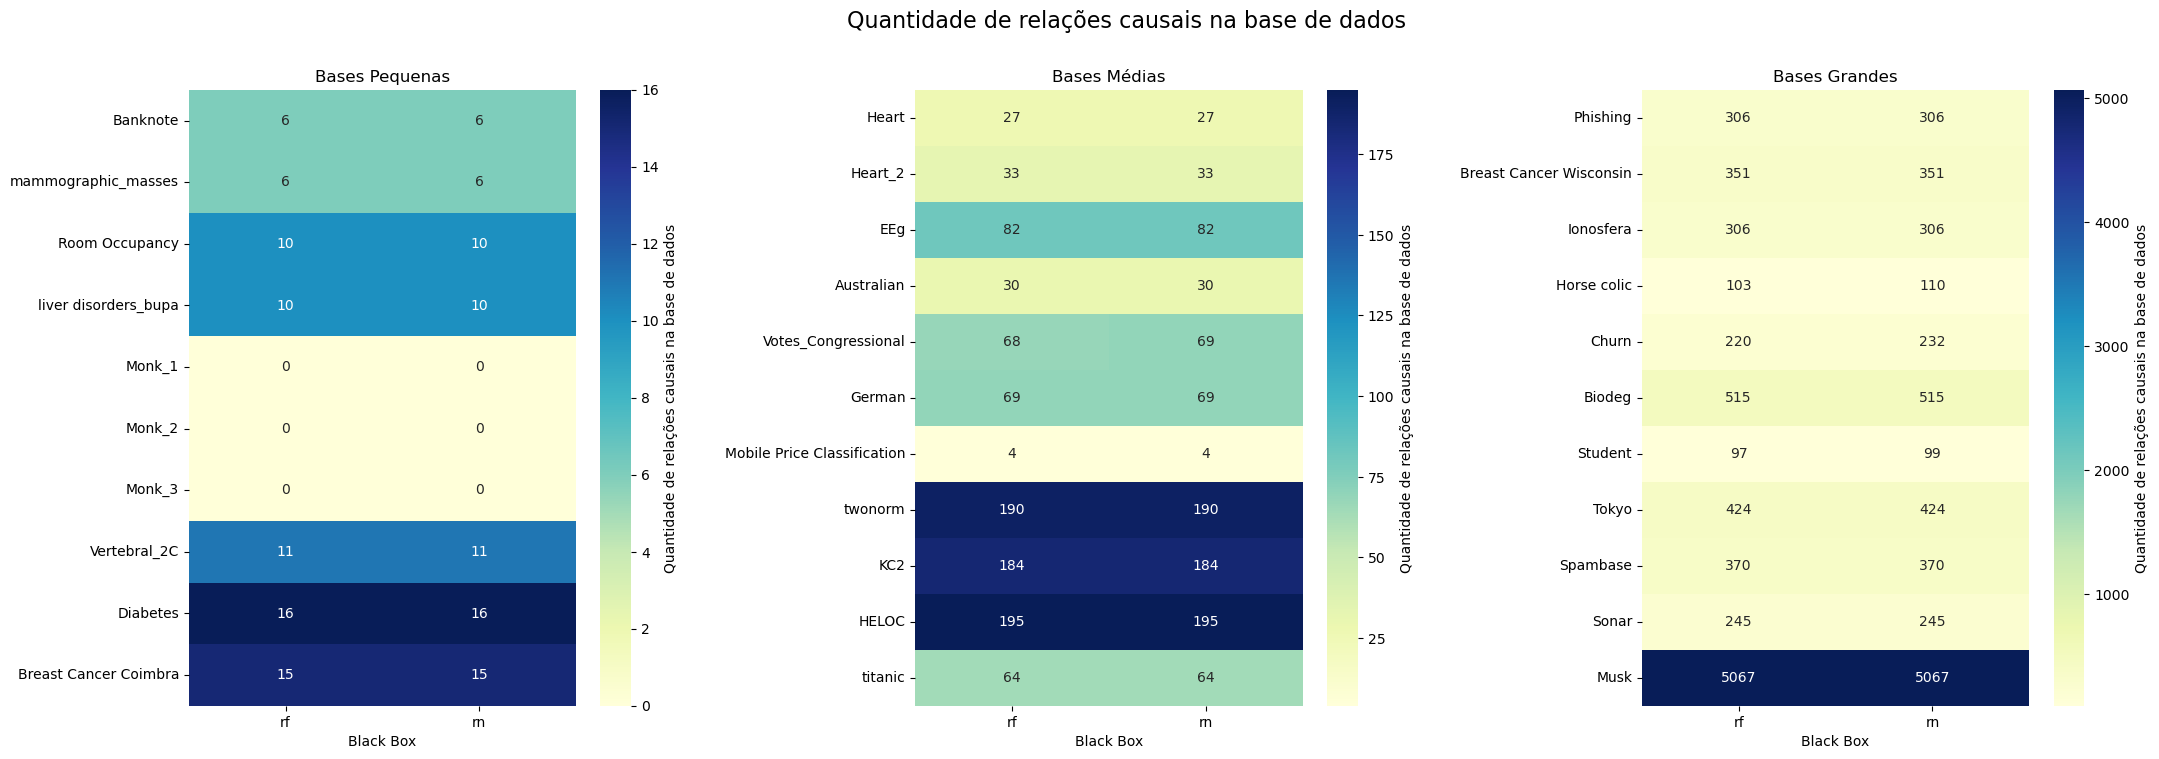

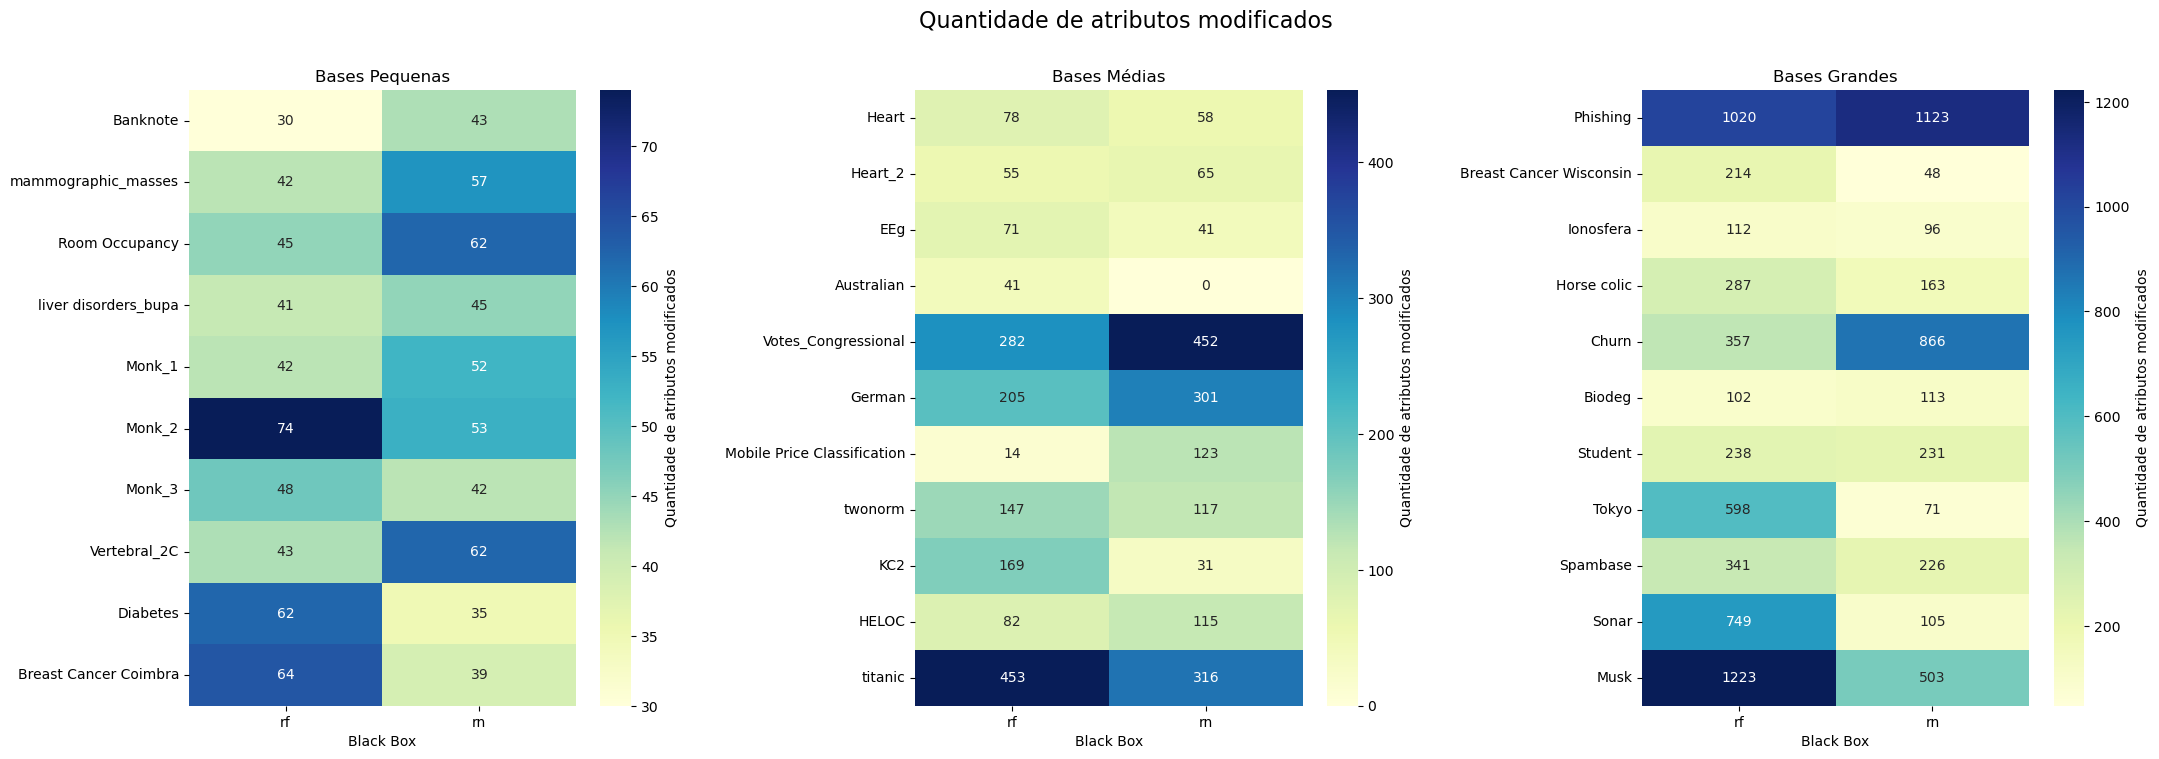

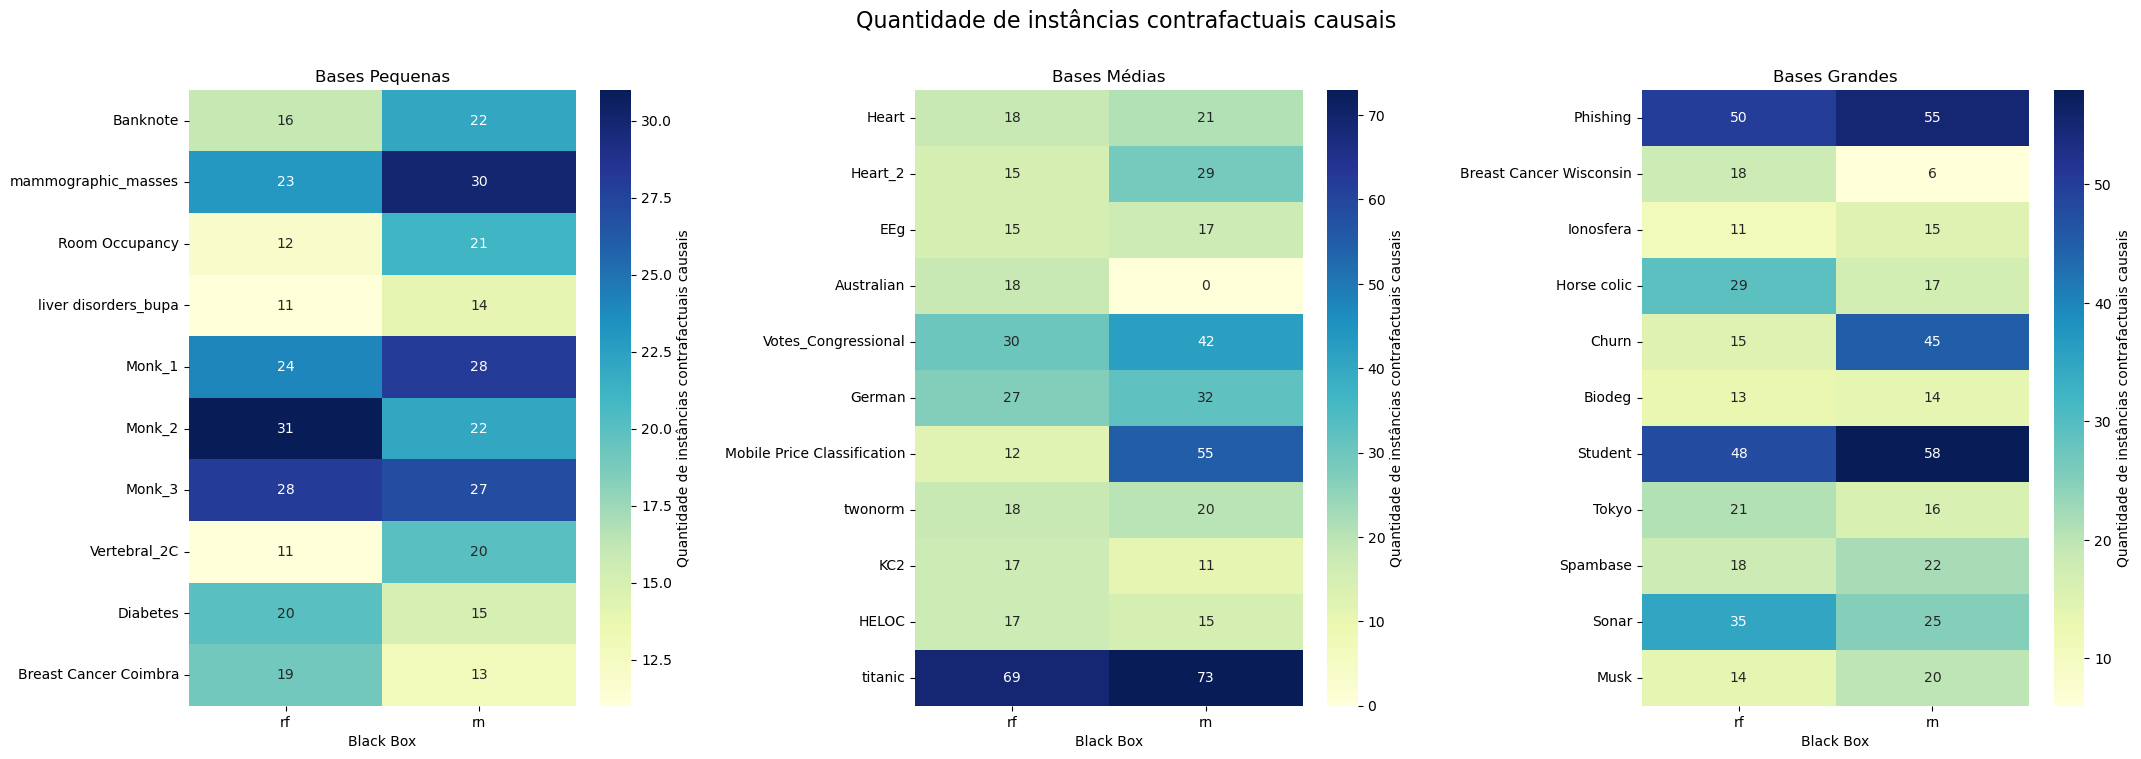

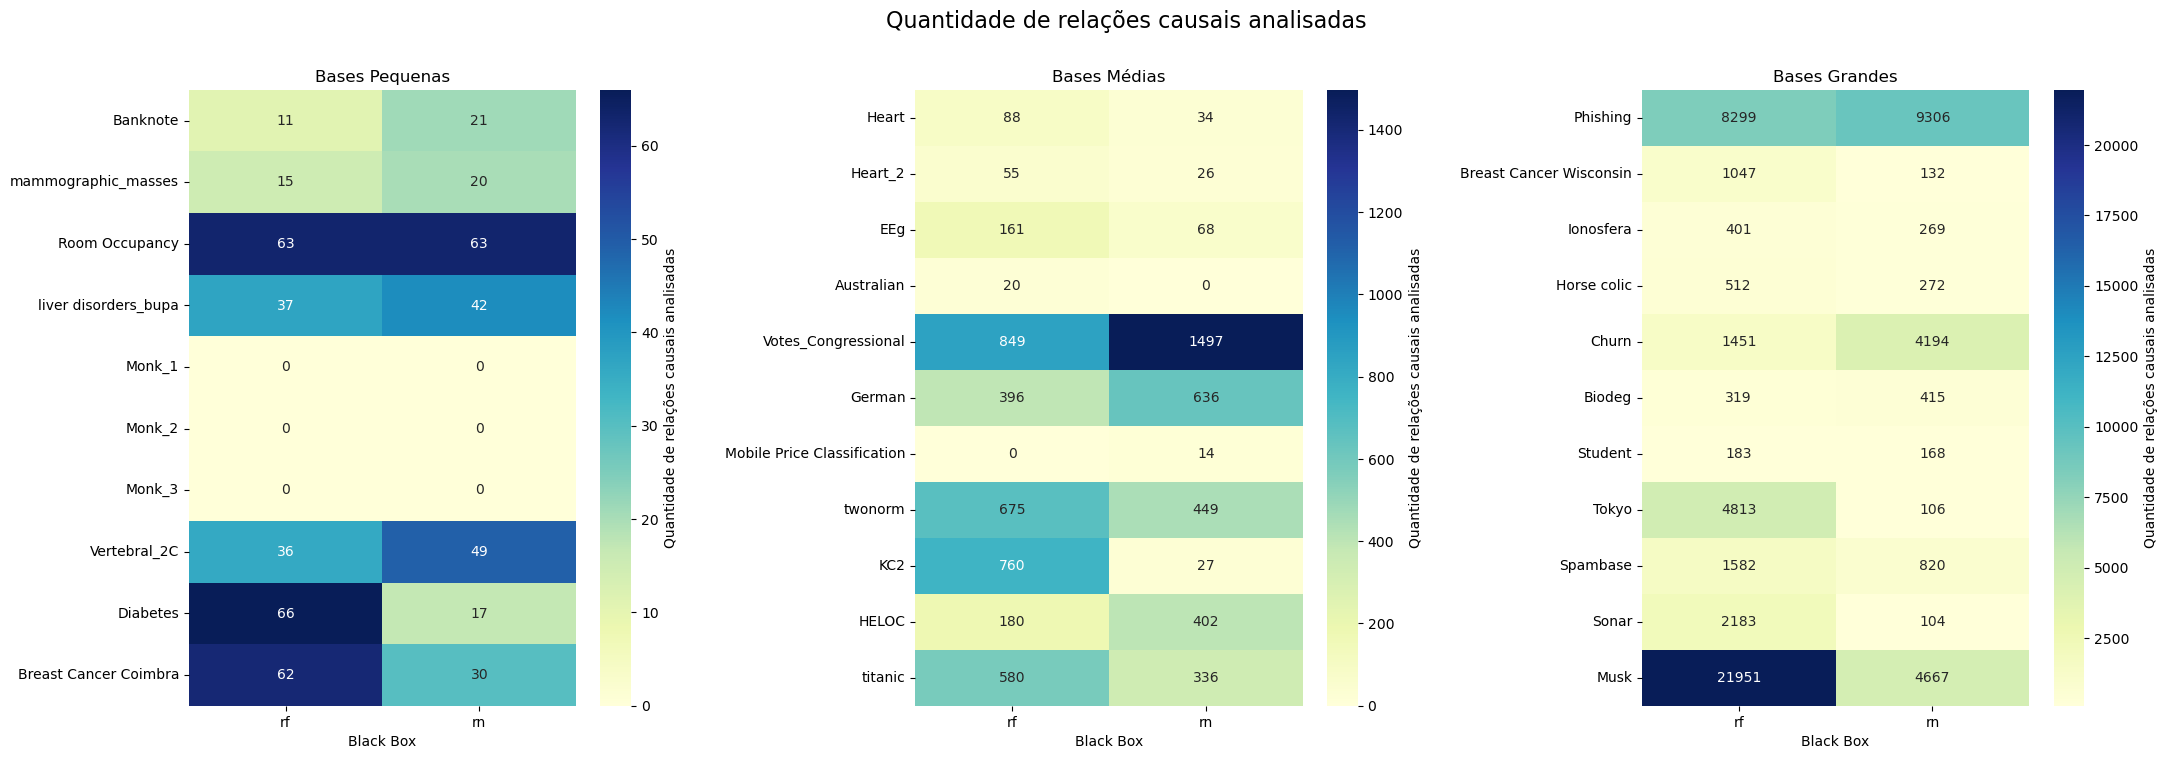

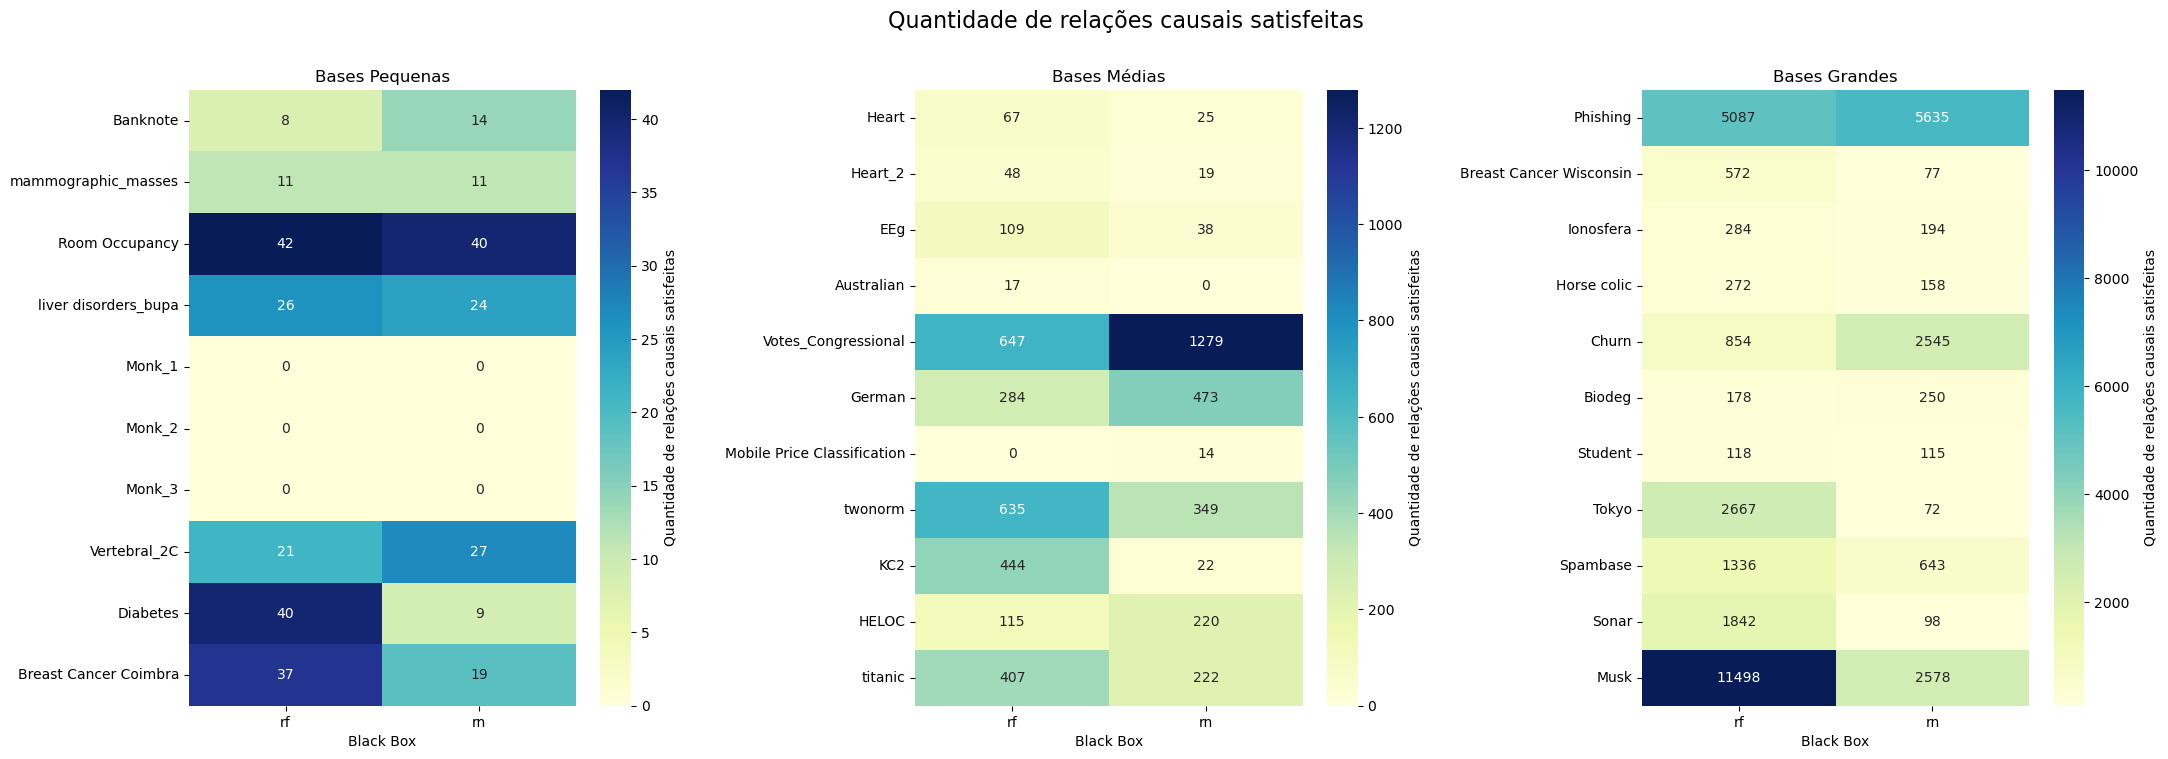

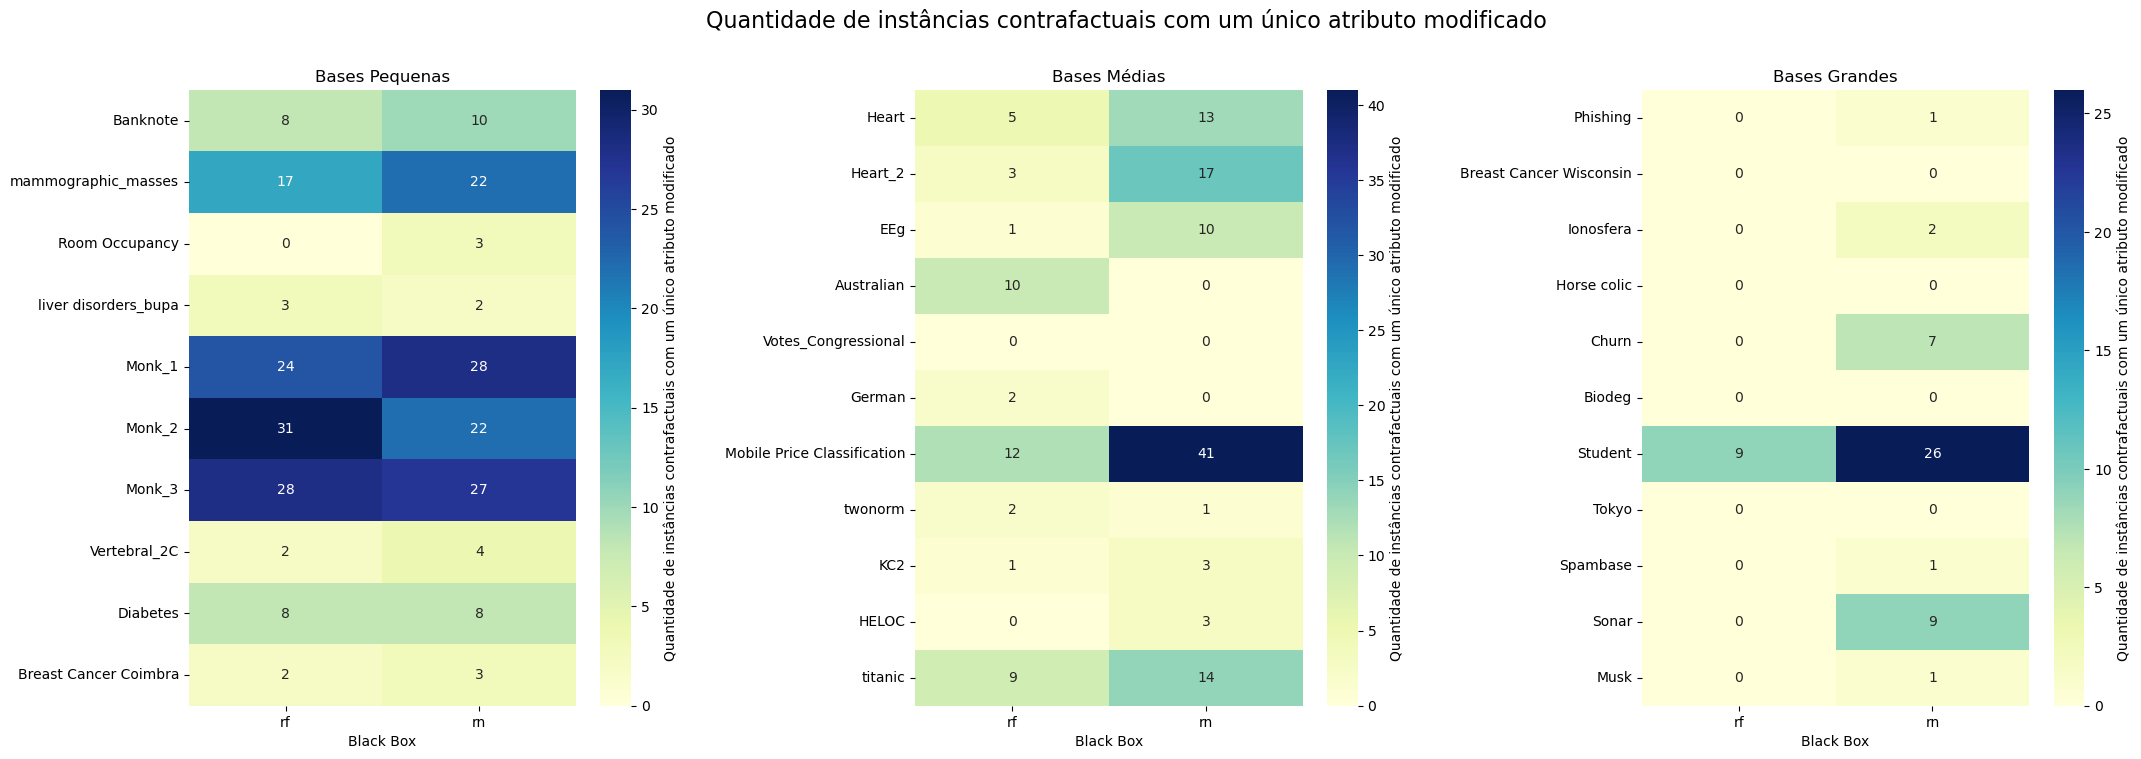

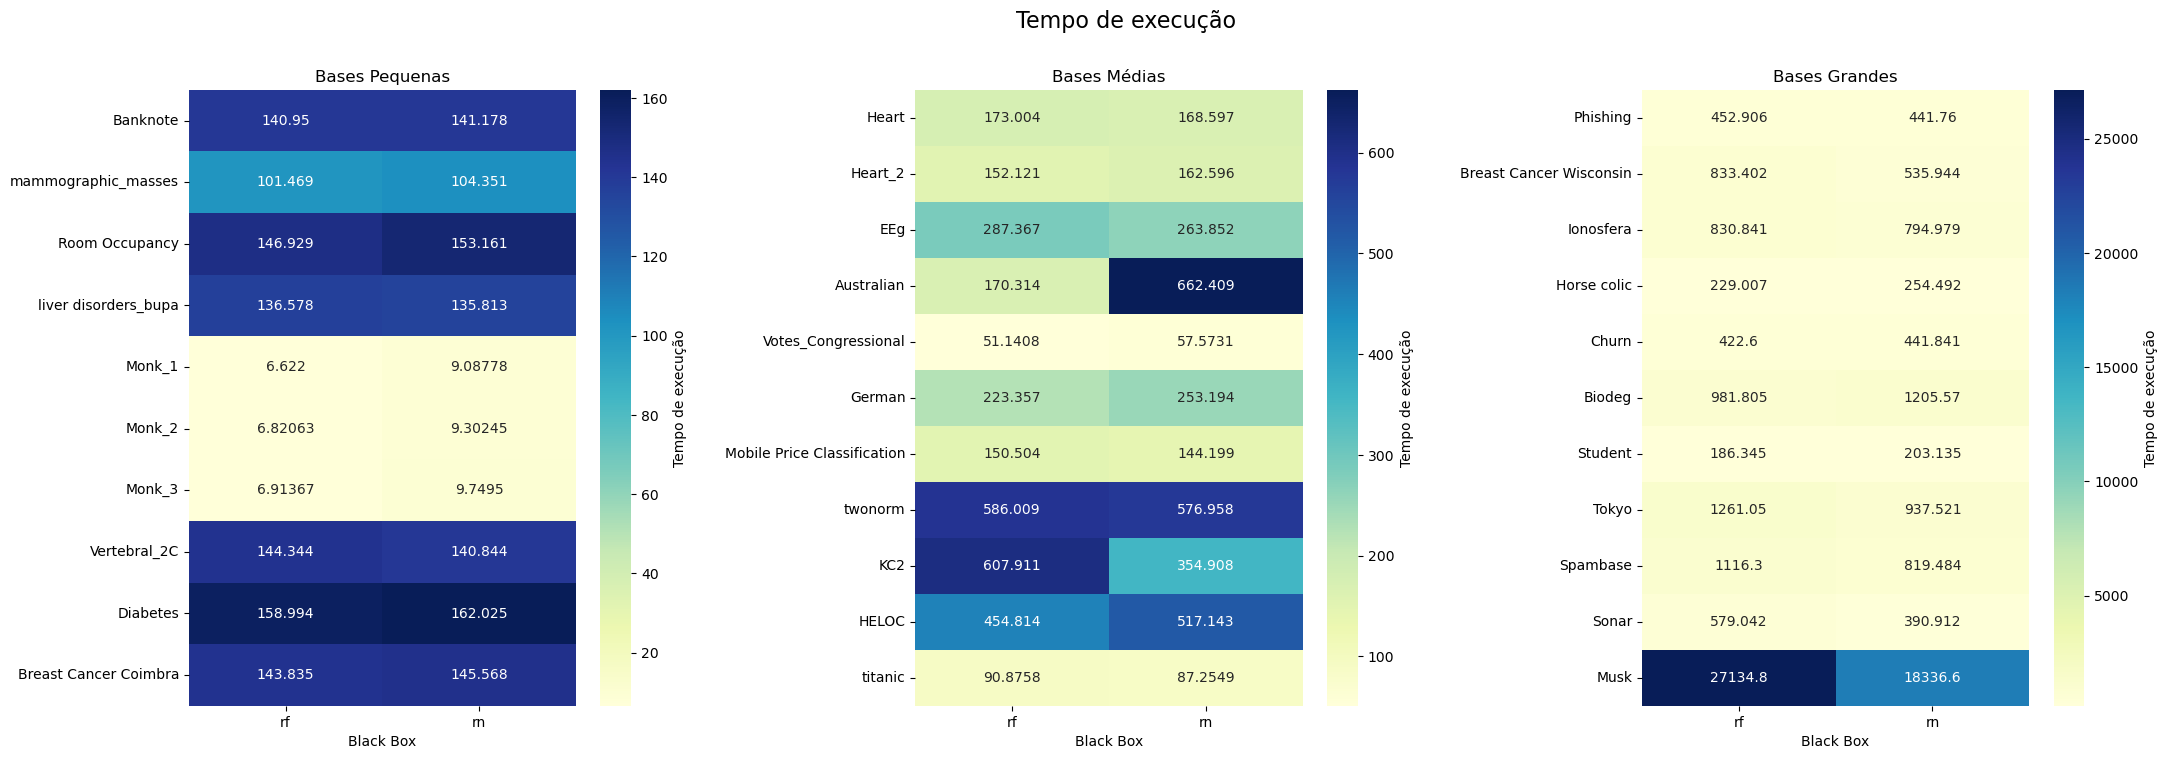

In [42]:
for metric in dfs.columns.levels[0]:  # Iterar sobre as métricas
    fig, axes = plt.subplots(1, 3, figsize=(25, 8))

    sns.heatmap(dfs[dfs.index.isin(pequeno)][metric], annot=True, cmap="YlGnBu", cbar_kws={'label': metric}, fmt="g", ax = axes[0])
    axes[0].set_title(f'Bases Pequenas')
    axes[0].set_xlabel('Black Box')
    
    sns.heatmap(dfs[dfs.index.isin(medio)][metric], annot=True, cmap="YlGnBu", cbar_kws={'label': metric}, fmt="g", ax = axes[1])
    axes[1].set_title(f'Bases Médias')
    axes[1].set_xlabel('Black Box')
    
    sns.heatmap(dfs[dfs.index.isin(grande)][metric], annot=True, cmap="YlGnBu", cbar_kws={'label': metric}, fmt="g", ax = axes[2])
    axes[2].set_title(f'Bases Grandes')
    axes[2].set_xlabel('Black Box')
    
    fig.suptitle(f'{metric}', fontsize=16)
    plt.subplots_adjust(wspace=0.5)  # Aumenta o espaçamento horizontal entre os gráficos


        
    plt.show()

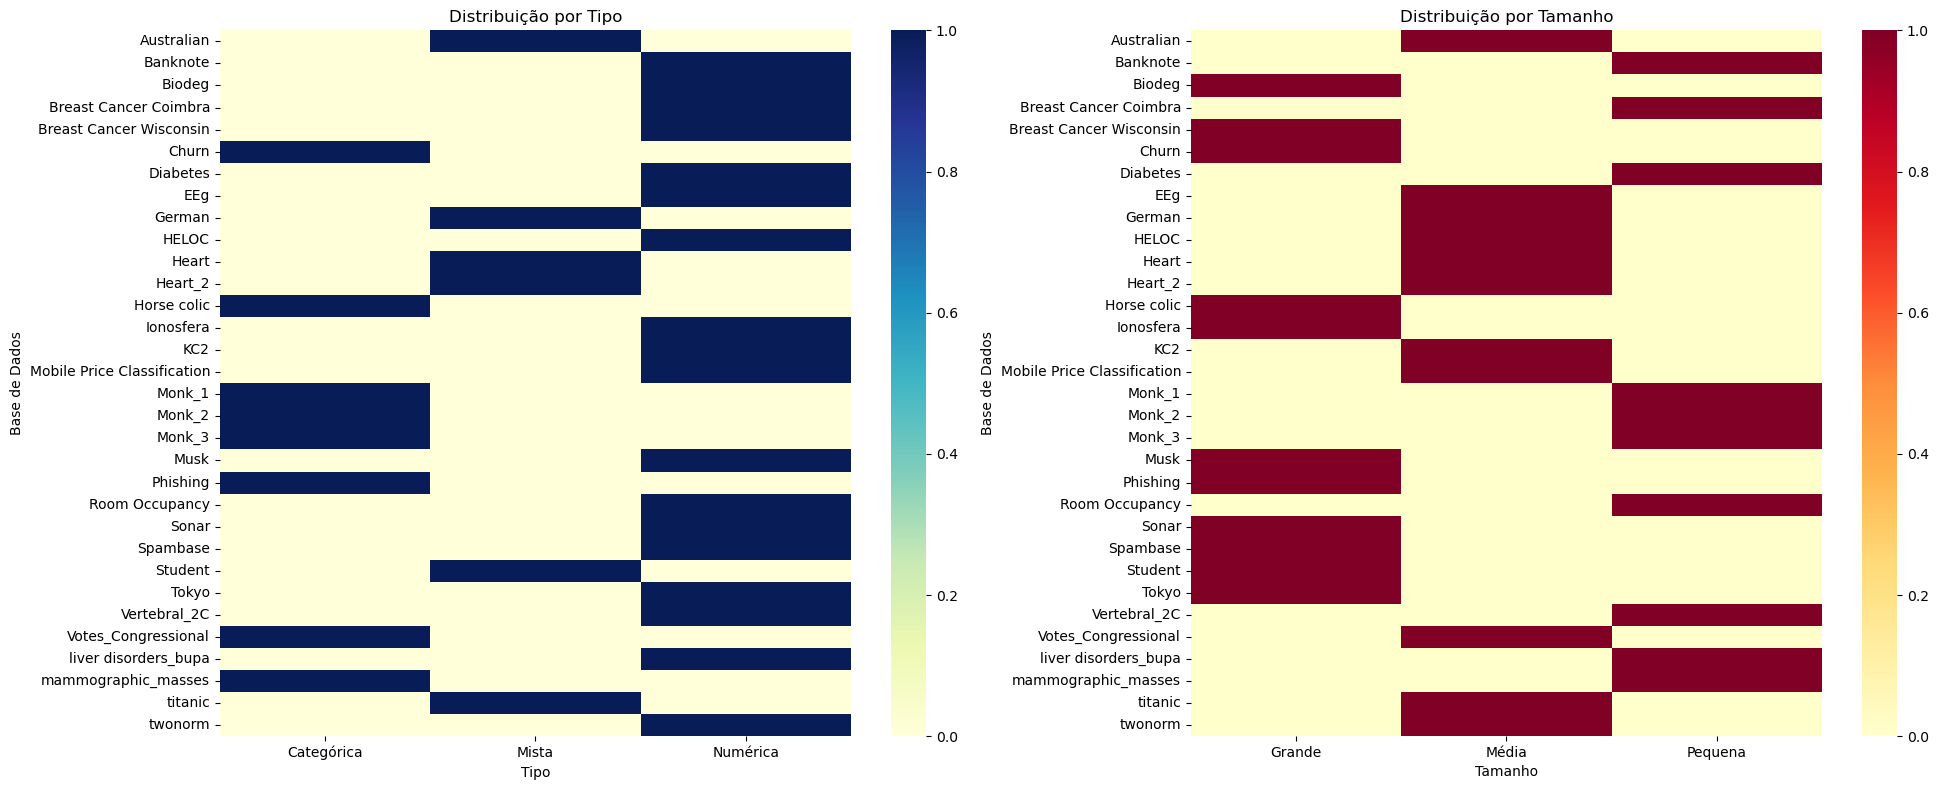

In [14]:
# Configuração dos gráficos lado a lado

# Heatmap para 'Tipo'
sns.heatmap(heatmap_tipo, cmap="YlGnBu", ax=axes[0])
axes[0].set_title('Distribuição por Tipo')
axes[0].set_ylabel('Base de Dados')
axes[0].set_xlabel('Tipo')

# Heatmap para 'Tamanho'
sns.heatmap(heatmap_tamanho, cmap="YlOrRd", ax=axes[1])
axes[1].set_title('Distribuição por Tamanho')
axes[1].set_ylabel('Base de Dados')
axes[1].set_xlabel('Tamanho')

# Ajustando layout
plt.tight_layout()
plt.show()


In [15]:
heatmap_tipo

Tipo                         Categórica  Mista  Numérica
row_0                                                   
Australian                            0      1         0
Banknote                              0      0         1
Biodeg                                0      0         1
Breast Cancer Coimbra                 0      0         1
Breast Cancer Wisconsin               0      0         1
Churn                                 1      0         0
Diabetes                              0      0         1
EEg                                   0      0         1
German                                0      1         0
HELOC                                 0      0         1
Heart                                 0      1         0
Heart_2                               0      1         0
Horse colic                           1      0         0
Ionosfera                             0      0         1
KC2                                   0      0         1
Mobile Price Classification           0      0         1
Monk_1                                1      0         0
Monk_2                                1      0         0
Monk_3                                1      0         0
Musk                                  0      0         1
Phishing                              1      0         0
Room Occupancy                        0      0         1
Sonar                                 0      0         1
Spambase                              0      0         1
Student                               0      1         0
Tokyo                                 0      0         1
Vertebral_2C                          0      0         1
Votes_Congressional                   1      0         0
liver disorders_bupa                  0      0         1
mammographic_masses                   1      0         0
titanic                               0      1         0
twonorm                               0      0         1